<a href="https://colab.research.google.com/github/jedammala1/cancer_prediction_analysis/blob/main/cancer_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone information from Kaggle into Google Colabs**

In [ ]:
!pip install kaggle lifelines scikit-survival pyts survshap

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=076244269664df8f54ea2df3d64f160faf199720cd3a047eb6bac216bc4d38db
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.5
    Uninstalling osqp-1.0.5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!mkdir -p ~/.kaggle

In [ ]:
import os
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    new_path = os.path.join("/root/.kaggle", filename)
    os.replace(filename, new_path)
    print(f"Moved {filename} to {new_path}")

Saving kaggle.json to kaggle.json
Moved kaggle.json to /root/.kaggle/kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download reihanenamdari/breast-cancer

Dataset URL: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/42.8k [00:00<?, ?B/s]
100% 42.8k/42.8k [00:00<00:00, 172MB/s]


In [ ]:
! unzip breast-cancer.zip

Archive:  breast-cancer.zip
  inflating: Breast_Cancer.csv       


**Loading the CSV data from the downloaded CSV file**

In [ ]:
import pandas as pd
df_raw_data = pd.read_csv('/content/Breast_Cancer.csv')

**Data Exploration**

In [ ]:
df_raw_data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
df_raw_data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
df_raw_data.shape

(4024, 16)

In [ ]:
df_raw_data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

**Data Cleaning**

In [ ]:
df_raw_data.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


**This prove that we have no-null values in any columns**

In [ ]:
int(df_raw_data.duplicated().sum())

1

In [ ]:
df_raw_data[df_raw_data.duplicated(keep=False)]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


We detected a **one duplicate observation** in the dataset and removed it to prevent data leakage and biased performance estimates during model training.

In [ ]:
df_raw_data=df_raw_data.drop_duplicates()

In [ ]:
int(df_raw_data.duplicated().sum())

0

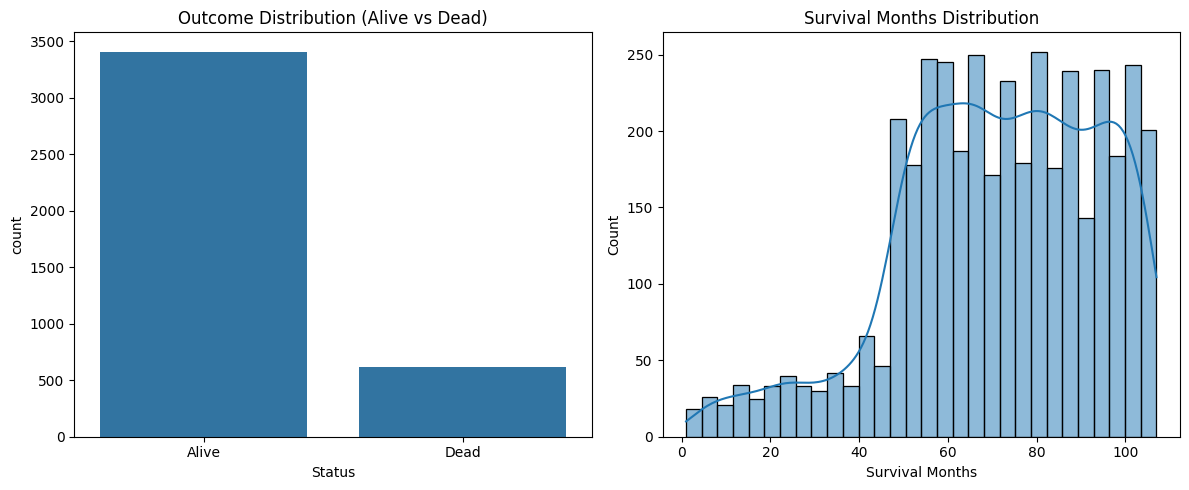

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df_raw_data, x="Status", ax=axes[0])
axes[0].set_title("Outcome Distribution (Alive vs Dead)")

sns.histplot(data=df_raw_data, x="Survival Months", bins=30, kde=True, ax=axes[1])
axes[1].set_title("Survival Months Distribution")

plt.tight_layout()
plt.show()



## Observation analysis on Outcome Distribution
The dataset is not balanced because most of the patients are labeled Alive and only a few are labeled Dead. Because of this imbalance, accuracy alone would not be a good way to judge a model. Models could easily guess "Alive" for most cases and seem right, but they would miss a lot of real deaths.This means that when training ML, we should use balanced metrics like F1-score, ROC-AUC, and Precision-Recall. we might also want to use techniques like class weighting or resampling.

## Observation analysis on Survival Months Distribution
Most patients lived for 40 to 100 months, with the most common length of time being 60 to 90 months. There aren't many patients who die within 20 months, which means that early death isn't very common in this dataset. The tail that goes beyond 100 months shows a group of people who have lived a long time.

## Key points


1.   Since the dataset is imbalance, must handle carefully during model training.



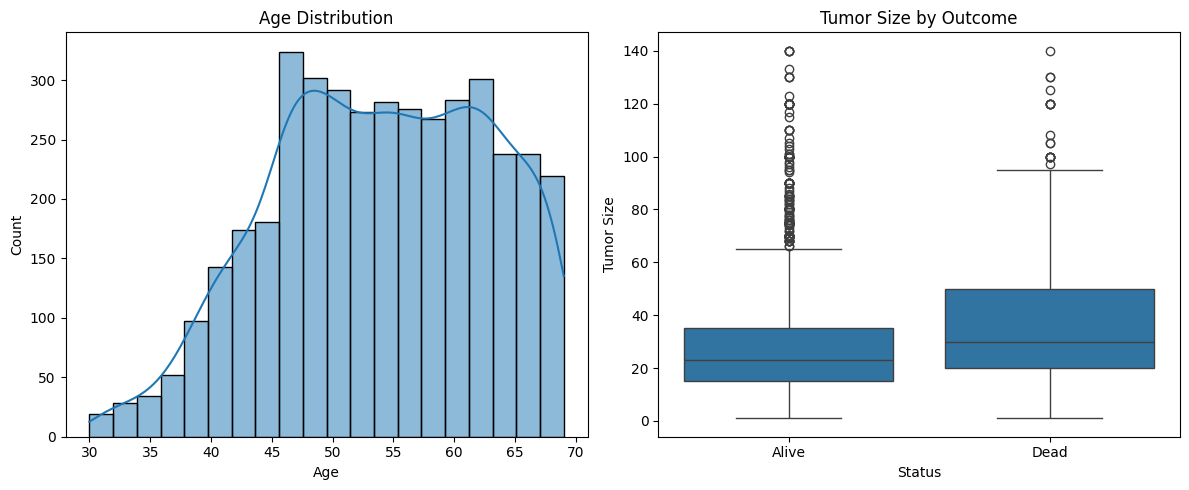

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_raw_data["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.boxplot(data=df_raw_data, x="Status", y="Tumor Size", ax=axes[1])
axes[1].set_title("Tumor Size by Outcome")

plt.tight_layout()
plt.show()

## Observation analysis on Age Distribution

The age range of patients is mostly between 45 and 65 years old, with the most common ages being in the late 40s to early 60s. There aren't many patients who are younger than 35 or older than 70, which suggests that the dataset mostly includes women in their middle years or older who have breast cancer. This aligns with epidemiological evidence that breast cancer incidence increases with age, particularly after menopause.


## Observation analysis on Tumor Size by Outcome

Patients who died generally possess larger tumours in comparison to those who survived. The **Dead** group has a higher median tumour size than the **Alive** group. The interquartile range (IQR) is also bigger in the "Dead" group, which means that the size of the tumours in the group of people who didn't survive was more varied.Both groups have a lot of outliers, but survivors have the most. This shows that some patients with relatively large tumours still survived, possibly because of effective treatment or good biological traits.
In general, the size of a tumour seems to be an important factor in how well a person will survive, with bigger tumours linked to worse outcomes.

## Key Points



1.   The dataset primarily comprises middle-aged to elderly women, aligning with established breast cancer risk demographics.

2.   The size of a tumour is strongly linked to the outcome, which makes it even more important as a feature in predictive modelling.

 3.  Outliers indicate that survival is contingent upon various factors, rather than tumour size alone, thereby validating a multi-feature machine learning methodology.




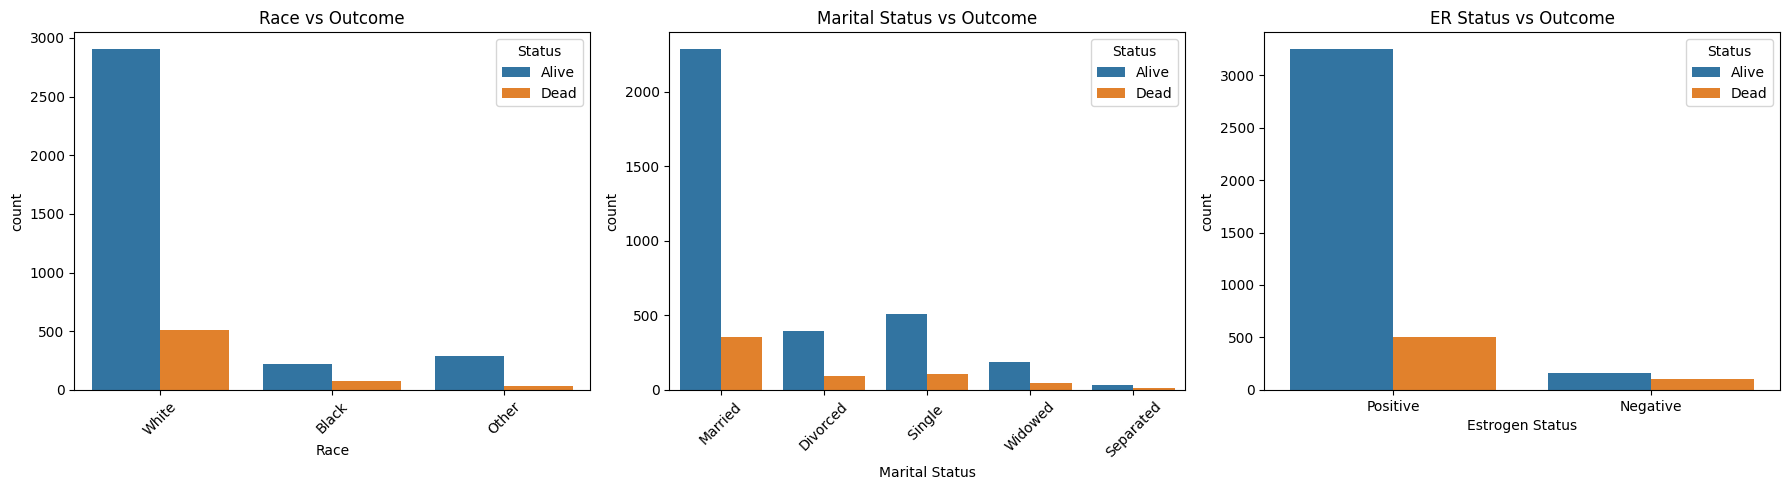

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df_raw_data, x="Race", hue="Status", ax=axes[0])
axes[0].set_title("Race vs Outcome")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_raw_data, x="Marital Status", hue="Status", ax=axes[1])
axes[1].set_title("Marital Status vs Outcome")
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df_raw_data, x="Estrogen Status", hue="Status", ax=axes[2])
axes[2].set_title("ER Status vs Outcome")

plt.tight_layout()
plt.show()

## Observation analysis on Race vs Outcome

Most of the patients in the dataset are White, followed by a smaller number of Black and Other races. Survival outcomes seem to be better for White patients, as shown by the fact that more of them are still alive than dead.The sample size for Black and Other races is significantly smaller, yet there appears to be a marginally elevated proportion of deaths in relation to their group size, potentially indicating recognised racial disparities in breast cancer outcomes.

## Observation analysis on Marital Status vs Outcome

Married patients form the largest subgroup and also show higher survival compared to other categories. Single and divorced patients show a noticeably higher proportion of deaths compared to married patients. Widowed and separated patients are relatively few, but they show poorer survival patterns. These patterns are consistent with literature suggesting that social and marital support may play a protective role in survival, possibly through better treatment adherence and psychological support.

## Observation analysis on Estrogen Receptor (ER) Status vs Outcome

Patients with ER-positive tumors show markedly better survival outcomes, with the majority being alive. In contrast, ER-negative patients have a higher proportion of deaths, despite being a much smaller group overall.


## Key Points

1.  Race, marital status, and ER status all show strong associations with survival.

2.  These categorical features are not just demographic variables but potentially important predictors for modeling survival outcomes.

3.  The results also highlight socio-demographic disparities (race, marital support) alongside biological factors (ER status), which together influence breast cancer prognosis.

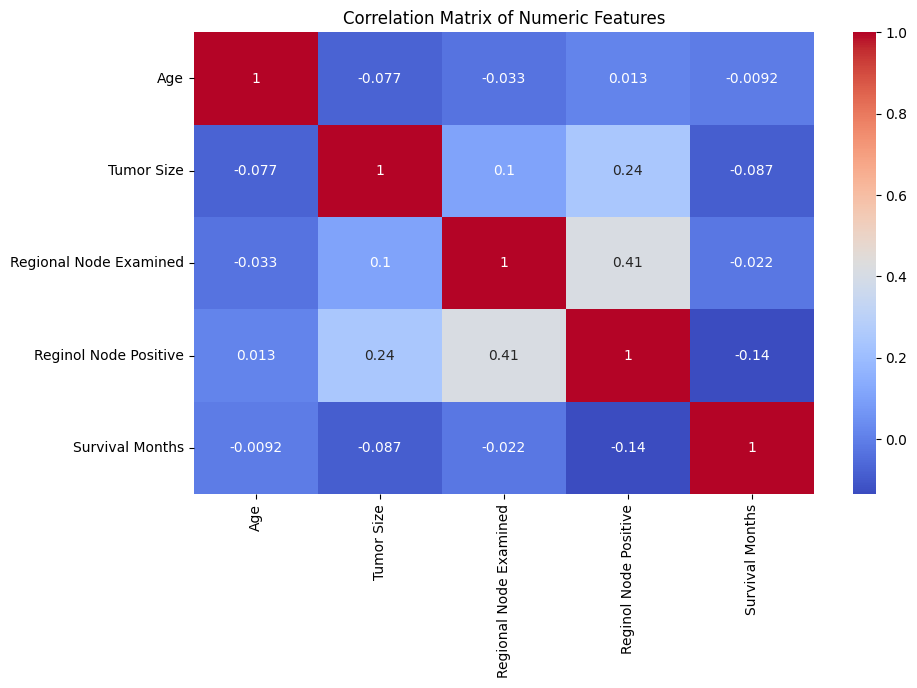

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_raw_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

## Correlation Analysis

### 1. Age

There are very weak correlations with other variables (all < |0.1|). Indicates that age is an autonomous risk factor, not significantly correlated with tumor size, lymph node counts, or survival duration.

### 2. Tumor Size

Has a positive correlation with Regional Node Positive (0.24). Larger tumors usually have more lymph nodes that are positive. Also weakly linked to Regional Node Examined (0.10), which could be a sign of how things are done in the real world (bigger tumors leading to more thorough exams).There is a small negative correlation with Survival Months (-0.087), which means that bigger tumors are linked to shorter survival, which is what doctors expect.

### 3. Regional Node Examined

Moderately correlated with Regional Node Positive (0.41). The greater the number of nodes analyzed, the increased likelihood of identifying positive nodes.There is a weak link between this feature and others, and it has a very small direct link to survival (-0.022).

### 4. Regional Node Positive

The strongest negative correlation with Survival Months (-0.14) of all the variables. Patients with a greater number of positive lymph nodes generally exhibit reduced survival, thereby validating its significance as a crucial prognostic indicator.

### 5. Survival Months

Weak negative correlations with Tumor Size (-0.087) and Regional Node Positive (-0.14). These characteristics have an effect on survival, but other non-numeric factors (like hormone receptor status, grade, and treatment response) also play a role.

**Data Transformation**

In [ ]:
Binary_encoding={"Estrogen Status": {"Positive": 1, "Negative": 0},
    "Progesterone Status": {"Positive": 1, "Negative": 0},
    "A Stage": {"Regional": 0, "Distant": 1},
    "Status": {"Alive": 0, "Dead": 1}}

df_raw_data.replace(Binary_encoding, inplace=True)

/tmp/ipython-input-397736371.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw_data.replace(Binary_encoding, inplace=True)


In [ ]:
df_raw_data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,0,4,1,1,24,1,60,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,0,35,1,1,14,5,62,0
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,0,63,1,1,14,7,75,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,0,18,1,1,2,1,84,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,0,41,1,1,3,1,50,0


In [ ]:
df_raw_data["Status"].value_counts()

,count
Status,
0,3407
1,616


In [ ]:
df_raw_data.columns = df_raw_data.columns.str.strip()
nominal_cols = [
    "Race", "Marital Status", "T Stage", "N Stage",
    "6th Stage", "differentiate","Grade"
]
df_raw_data = pd.get_dummies(df_raw_data, columns=nominal_cols, drop_first=True)

In [ ]:
df_raw_data.head()

,Age,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,...,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3
0,68,0,4,1,1,24,1,60,0,False,...,False,False,False,False,True,False,False,False,False,True
1,50,0,35,1,1,14,5,62,0,False,...,False,True,False,False,False,False,False,False,True,False
2,58,0,63,1,1,14,7,75,0,False,...,False,False,False,True,False,False,False,False,True,False
3,58,0,18,1,1,2,1,84,0,False,...,False,False,False,False,True,False,False,False,False,True
4,47,0,41,1,1,3,1,50,0,False,...,True,False,False,False,True,False,False,False,False,True


In [ ]:
bool_cols = df_raw_data.select_dtypes(include='bool').columns
df_raw_data[bool_cols] = df_raw_data[bool_cols].astype(int)

In [ ]:
df_raw_data.head()

,Age,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,...,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3
0,68,0,4,1,1,24,1,60,0,0,...,0,0,0,0,1,0,0,0,0,1
1,50,0,35,1,1,14,5,62,0,0,...,0,1,0,0,0,0,0,0,1,0
2,58,0,63,1,1,14,7,75,0,0,...,0,0,0,1,0,0,0,0,1,0
3,58,0,18,1,1,2,1,84,0,0,...,0,0,0,0,1,0,0,0,0,1
4,47,0,41,1,1,3,1,50,0,0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
df_transformed_data=df_raw_data.copy()

**Classification Model creation, Traning and Evaluation**

In [ ]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             average_precision_score, precision_recall_curve, roc_curve)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

If you include survival_months as a feature, you are leaking outcome information:
  - A patient who died after 12 months has survival_months=12.
  - A patient alive at 120 months has survival_months=120.

The model can leads high accuracy, but no clinical meaning. so we are droping the Survival Months from feature list.

In [ ]:
x=df_transformed_data.drop(["Status","Survival Months"],axis=1)
y=df_transformed_data["Status"]

Splitting the dataset using 80% data from training and 20% data fro testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

In [ ]:
print("Traning labels count")
print(y_train.value_counts())
print("\n\nTesting labels count")
print(y_test.value_counts())


Traning labels count
Status
0    2725
1     493
Name: count, dtype: int64


Testing labels count
Status
0    682
1    123
Name: count, dtype: int64


We used 5-fold stratified cross-validation (StratifiedKFold) to evaluate model performance, ensuring each fold preserved the 85:15 Alive-to-Dead ratio. This reduces bias from imbalance and provides robust, reproducible performance estimates.

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


**Traning and Evaluation of LogisticRegression model**

CV ROC-AUC: 0.739
CV PR-AUC : 0.399
Chosen CV threshold by F1 (Dead=1): 0.529

=== Test @ threshold 0.5 ===
              precision    recall  f1-score   support

   Alive (0)       0.91      0.72      0.80       682
    Dead (1)       0.28      0.60      0.38       123

    accuracy                           0.70       805
   macro avg       0.59      0.66      0.59       805
weighted avg       0.81      0.70      0.74       805

Test ROC-AUC: 0.7315523448489617
Test PR-AUC : 0.3750922901448529


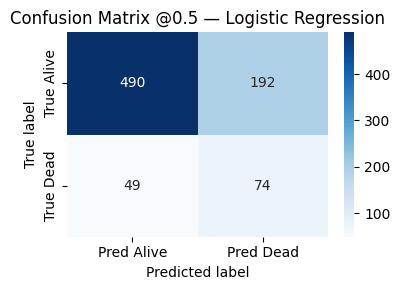


=== Test @ tuned threshold 0.529 ===
              precision    recall  f1-score   support

   Alive (0)       0.91      0.75      0.82       682
    Dead (1)       0.29      0.57      0.39       123

    accuracy                           0.73       805
   macro avg       0.60      0.66      0.61       805
weighted avg       0.81      0.73      0.76       805



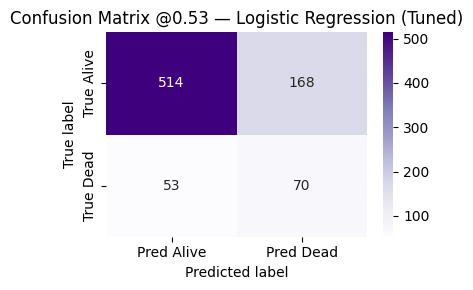

In [ ]:
LRM = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
pipe = Pipeline(steps=[
    ("os", RandomOverSampler(random_state=42)), #fix class imbalance by oversampling the minority class
    ("scale", StandardScaler()),
    ("clf", LRM)
])

oof_prob = cross_val_predict(
    pipe, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

# Threshold-free CV metrics
cv_roc = roc_auc_score(y_train, oof_prob)
cv_pr  = average_precision_score(y_train, oof_prob)
print(f"CV ROC-AUC: {cv_roc:.3f}")
print(f"CV PR-AUC : {cv_pr:.3f}")

# Choose a decision threshold from CV (maximize F1 for the positive class=Dead=1)
prec, rec, thr = precision_recall_curve(y_train, oof_prob)
f1s = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_th = thr[best_idx] if best_idx < len(thr) else 0.5
print(f"Chosen CV threshold by F1 (Dead=1): {best_th:.3f}")

# ==== Fit on all TRAIN, evaluate once on TEST ====
pipe.fit(X_train, y_train)

y_prob = pipe.predict_proba(X_test)[:, 1]
y_pred_default = (y_prob >= 0.5).astype(int)
y_pred_tuned   = (y_prob >= best_th).astype(int)

# --- Reports & metrics @ 0.5 ---
print("\n=== Test @ threshold 0.5 ===")
print(classification_report(y_test, y_pred_default, target_names=["Alive (0)", "Dead (1)"]))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Test PR-AUC :", average_precision_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred_default, labels=[0, 1])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Alive", "Pred Dead"],
            yticklabels=["True Alive", "True Dead"])
plt.title("Confusion Matrix @0.5 — Logistic Regression")
plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()

# --- Reports & metrics @ tuned threshold ---
print(f"\n=== Test @ tuned threshold {best_th:.3f} ===")
print(classification_report(y_test, y_pred_tuned, target_names=["Alive (0)", "Dead (1)"]))

cm_tuned = confusion_matrix(y_test, y_pred_tuned, labels=[0, 1])
plt.figure(figsize=(4, 3))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Pred Alive", "Pred Dead"],
            yticklabels=["True Alive", "True Dead"])
plt.title(f"Confusion Matrix @{best_th:.2f} — Logistic Regression (Tuned)")
plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()

## **Analysis Report**

### **Logistic Regression**

#### **Overview**
The Logistic Regression model was trained with class_weight="balanced" on the scaled training set and evaluated on the test set using classification reports and confusion matrices at two thresholds: the default (0.5) and the tuned threshold (0.53).

**Class labels**

1. Status = 0 - Alive
2. Status = 1 - Dead

#### **Why we used class_weight="balanced"**

- The dataset is **imbalanced** (Alive=0 cases greatly outnumber Dead=1 cases).
  In the SEER-derived dataset, Alive patients are ~85% and Dead patients ~15%.
- The balanced option automatically adjusts class weights inversely proportional
  to class frequencies so that errors on the minority class (Dead=1) are penalized
  more heavily during training.

#### **Results at threshold = 0.5 (default)**

1. Class 0 (Alive): Precision = 0.91, Recall = 0.72, F1 = 0.80

2. Class 1 (Dead): Precision = 0.28, Recall = 0.60, F1 = 0.38

3. Overall Accuracy: 0.70

4. ROC-AUC: 0.732, PR-AUC: 0.376

##### **Confusion matrix (0.5)**:

1. True Alive correctly predicted: 490

2. True Dead correctly predicted: 74

3. False negatives (Dead predicted as Alive): 49

4. False positives (Alive predicted as Dead): 192

##### **Interpretation**:
The model shows moderate sensitivity for Dead patients (recall = 0.60), meaning it correctly identifies around 6 in 10 actual deaths. However, its precision is low (= 0.28), so more than 7 out of 10 patients predicted as Dead are actually Alive. In practice, this means the model catches many true Dead cases, but it also produces a large number of false alarms.


#### **Results at tuned threshold = 0.53**

1. Class 0 (Alive): Precision = 0.91, Recall = 0.75, F1 = 0.82

2. Class 1 (Dead): Precision = 0.29, Recall = 0.57, F1 = 0.39

3. Overall Accuracy: 0.73

##### **Confusion matrix (0.81)**:

1. True Alive correctly predicted: 514

2. True Dead correctly predicted: 70

3. False negatives (Dead predicted as Alive): 53

4. False positives (Alive predicted as Dead): 168

##### **Interpretation**:
The model becomes slightly more conservative in predicting Dead. Precision improves only marginally (0.29 vs 0.28), so predictions of Dead are just a little more reliable. However, recall falls from 0.60 to 0.57, meaning slightly fewer actual Dead patients are detected. In effect, the threshold adjustment reduces false positives somewhat, but at the cost of missing more true Dead cases.

#### **Takeaways**

**Threshold choice critically shapes model behavior**:

  - **At 0.5 (default)**:Recall for Dead=1 was higher (0.60), so the model identified more patients at risk of death. Precision was lower (0.28), which means many Alive patients were incorrectly flagged as Dead. This trade-off favors catching more true deaths but produces many false alarms.

  - **At 0.53 (tuned)**:Precision improved only slightly (0.29 vs 0.28), while recall decreased a little (0.57 vs 0.60). This adjustment reduced false positives somewhat, but it also caused the model to miss a few more true Dead cases. The change is modest, not dramatic.

**Clinical implication**: In medical prognosis, a false negative (missing a Dead patient) is more dangerous than a false positive (false alarm). Therefore, prioritizing recall remains important, even at the expense of precision or overall accuracy.

**Traning and Evaluation of XGBClassifier model**

CV ROC-AUC: 0.678
CV PR-AUC : 0.311
Chosen CV threshold by F1 (Dead=1): 0.433

=== Test @ threshold 0.5 ===
              precision    recall  f1-score   support

   Alive (0)       0.88      0.79      0.83       682
    Dead (1)       0.26      0.41      0.32       123

    accuracy                           0.73       805
   macro avg       0.57      0.60      0.58       805
weighted avg       0.79      0.73      0.76       805

Test ROC-AUC: 0.6794578356340747
Test PR-AUC : 0.2941241628452044


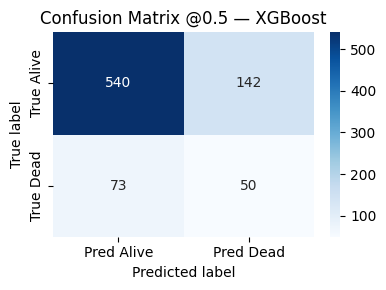


=== Test @ tuned threshold 0.433 ===
              precision    recall  f1-score   support

   Alive (0)       0.88      0.72      0.79       682
    Dead (1)       0.23      0.46      0.30       123

    accuracy                           0.68       805
   macro avg       0.55      0.59      0.55       805
weighted avg       0.78      0.68      0.72       805



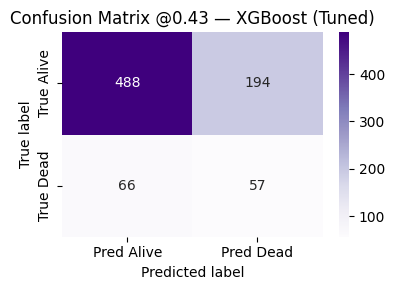

In [ ]:
XGBC = XGBClassifier(
    n_estimators=400, max_depth=4, learning_rate=0.05,
    subsample=0.9, colsample_bytree=0.9,
    eval_metric="logloss", random_state=42
)
pipe = Pipeline(steps=[
    ("os", RandomOverSampler(random_state=42)),  # resample inside each CV fold
    ("clf", XGBC)
])


oof_prob = cross_val_predict(
    pipe, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

# Threshold-free CV metrics
cv_roc = roc_auc_score(y_train, oof_prob)
cv_pr  = average_precision_score(y_train, oof_prob)
print(f"CV ROC-AUC: {cv_roc:.3f}")
print(f"CV PR-AUC : {cv_pr:.3f}")

# Choose decision threshold from CV (maximize F1 for Dead=1)
prec, rec, thr = precision_recall_curve(y_train, oof_prob)
f1s = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_th = thr[best_idx] if best_idx < len(thr) else 0.5
print(f"Chosen CV threshold by F1 (Dead=1): {best_th:.3f}")

# ==== Fit on all TRAIN, evaluate once on TEST ====
pipe.fit(X_train, y_train)
y_prob = pipe.predict_proba(X_test)[:, 1]

# Default 0.5
y_pred = (y_prob >= 0.5).astype(int)
print("\n=== Test @ threshold 0.5 ===")
print(classification_report(y_test, y_pred, target_names=["Alive (0)", "Dead (1)"]))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Test PR-AUC :", average_precision_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Alive", "Pred Dead"],
            yticklabels=["True Alive", "True Dead"])
plt.title("Confusion Matrix @0.5 — XGBoost")
plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()

# Tuned threshold from CV
y_pred_tuned = (y_prob >= best_th).astype(int)
print(f"\n=== Test @ tuned threshold {best_th:.3f} ===")
print(classification_report(y_test, y_pred_tuned, target_names=["Alive (0)", "Dead (1)"]))

cm_tuned = confusion_matrix(y_test, y_pred_tuned, labels=[0, 1])
plt.figure(figsize=(4, 3))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Pred Alive", "Pred Dead"],
            yticklabels=["True Alive", "True Dead"])
plt.title(f"Confusion Matrix @{best_th:.2f} — XGBoost (Tuned)")
plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()

## **Analysis Report**

### **XGBoost Classifier**

#### **Overview**
The XGBoost classifier was trained on the scaled training set with oversampling to address class imbalance. Its performance was evaluated on the test set using classification reports and confusion matrices at two thresholds: the default (0.5) and the tuned threshold (0.433, chosen by best F1 for Dead=1).

**Class labels**

1. Status = 0 - Alive
2. Status = 1 - Dead


#### **Results at threshold = 0.5 (default)**

1. Class 0 (Alive): Precision = 0.88, Recall = 0.79, F1 = 0.83

2. Class 1 (Dead): Precision = 0.26, Recall = 0.41, F1 = 0.32

3. Overall Accuracy: 0.73

4. ROC-AUC: 0.68, PR-AUC: 0.29

##### **Confusion matrix (0.5)**:

1. True Alive correctly predicted: 540

2. True Dead correctly predicted: 50

3. False negatives (Dead predicted as Alive): 73

4. False positives (Alive predicted as Dead): 142

##### **Interpretation**:
At the default threshold, the model shows limited ability to detect Dead patients. Recall is modest (0.41), but precision is very low (0.26), meaning most patients predicted as Dead are actually Alive. While some true Dead cases are identified, the high false alarm rate weakens clinical reliability.



#### **Results at tuned threshold = 0.433**

1. Class 0 (Alive): Precision = 0.88, Recall = 0.72, F1 = 0.79

2. Class 1 (Dead): Precision = 0.23, Recall = 0.46, F1 = 0.30

3. Overall Accuracy: 0.68

##### **Confusion matrix (0.433)**:

1. True Alive correctly predicted: 488

2. True Dead correctly predicted: 57

3. False negatives (Dead predicted as Alive): 66

4. False positives (Alive predicted as Dead): 194

##### **Interpretation**:
At the tuned threshold, recall for Dead patients increases slightly (0.46 vs 0.41), but precision drops further (0.23 vs 0.26). This means the model identifies a few more true Dead cases but at the cost of generating even more false positives. Accuracy also falls slightly (0.68 vs 0.73).

#### **Takeaways**

**Threshold choice critically shapes model behavior**:

  - **At 0.5 (default)**:Recall for Dead=1 was 0.41, and precision was 0.26, so the model detected some at-risk patients but produced many false alarms.

  - **At 0.433 (tuned)**:Recall improved modestly to 0.46, but precision dropped to 0.23, making Dead predictions even less trustworthy.

**Clinical implication**: With this XGBoost configuration, the model struggles to provide clinically useful predictions for Dead=1. Both ROC-AUC (0.68) and PR-AUC (0.29) indicate weak discriminative ability. Compared to Logistic Regression, XGBoost underperformed.

**Traning and Evaluation of RandomForestClarifier model**

CV ROC-AUC: 0.684
CV PR-AUC : 0.288
Chosen CV threshold by F1 (Dead=1): 0.323

=== Test @ threshold 0.5 ===
              precision    recall  f1-score   support

   Alive (0)       0.87      0.92      0.89       682
    Dead (1)       0.34      0.22      0.27       123

    accuracy                           0.82       805
   macro avg       0.60      0.57      0.58       805
weighted avg       0.79      0.82      0.80       805

Test ROC-AUC: 0.6768590706434924
Test PR-AUC : 0.26308595172385807


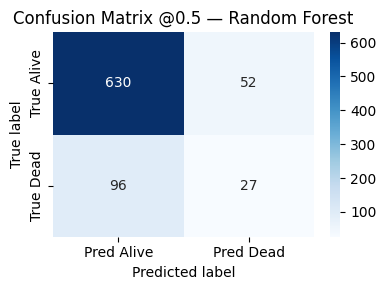


=== Test @ tuned threshold 0.323 ===
              precision    recall  f1-score   support

   Alive (0)       0.88      0.80      0.84       682
    Dead (1)       0.27      0.40      0.32       123

    accuracy                           0.74       805
   macro avg       0.57      0.60      0.58       805
weighted avg       0.79      0.74      0.76       805



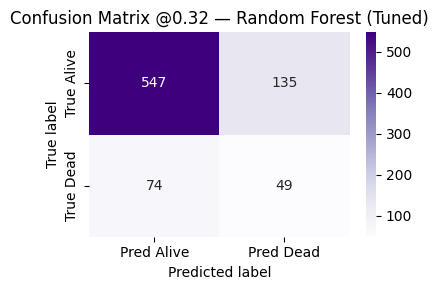

In [ ]:
RFCM = RandomForestClassifier(
    n_estimators=300, max_depth=None,
    min_samples_split=2, min_samples_leaf=1,
    random_state=42, class_weight=None, n_jobs=-1
)

pipe = Pipeline(steps=[
    ("os", RandomOverSampler(random_state=42)),  # resample within each CV fold
    ("clf", RFCM)
])

oof_prob = cross_val_predict(
    pipe, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

# Threshold-free CV metrics
cv_roc = roc_auc_score(y_train, oof_prob)
cv_pr  = average_precision_score(y_train, oof_prob)
print(f"CV ROC-AUC: {cv_roc:.3f}")
print(f"CV PR-AUC : {cv_pr:.3f}")

# Choose decision threshold from CV (maximize F1 for Dead=1)
prec, rec, thr = precision_recall_curve(y_train, oof_prob)
f1s = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_th = thr[best_idx] if best_idx < len(thr) else 0.5
print(f"Chosen CV threshold by F1 (Dead=1): {best_th:.3f}")

# ==== Fit on all TRAIN, evaluate once on TEST ====
pipe.fit(X_train, y_train)
y_prob = pipe.predict_proba(X_test)[:, 1]

# Default 0.5
y_pred = (y_prob >= 0.5).astype(int)
print("\n=== Test @ threshold 0.5 ===")
print(classification_report(y_test, y_pred, target_names=["Alive (0)", "Dead (1)"]))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Test PR-AUC :", average_precision_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Alive", "Pred Dead"],
            yticklabels=["True Alive", "True Dead"])
plt.title("Confusion Matrix @0.5 — Random Forest")
plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()

# Tuned threshold from CV
y_pred_tuned = (y_prob >= best_th).astype(int)
print(f"\n=== Test @ tuned threshold {best_th:.3f} ===")
print(classification_report(y_test, y_pred_tuned, target_names=["Alive (0)", "Dead (1)"]))

cm_tuned = confusion_matrix(y_test, y_pred_tuned, labels=[0, 1])
plt.figure(figsize=(4, 3))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Pred Alive", "Pred Dead"],
            yticklabels=["True Alive", "True Dead"])
plt.title(f"Confusion Matrix @{best_th:.2f} — Random Forest (Tuned)")
plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()

## **Analysis Report**

### **Random Forest Classifier**

#### **Overview**
The Random Forest model was trained on the scaled training set with oversampling. It was evaluated using classification reports and confusion matrices at the default threshold (0.5) and a tuned threshold (0.32, selected for best F1 on Dead=1).

**Class labels**

1. Status = 0 - Alive
2. Status = 1 - Dead


#### **Results at threshold = 0.5 (default)**

1. Class 0 (Alive): Precision = 0.87, Recall = 0.92, F1 = 0.89

2. Class 1 (Dead): Precision = 0.34, Recall = 0.22, F1 = 0.27

3. Overall Accuracy: 0.82

4. ROC-AUC: 0.67, PR-AUC: 0.263

##### **Confusion matrix (0.5)**:

1. True Alive correctly predicted: 630

2. True Dead correctly predicted: 27

3. False negatives (Dead predicted as Alive): 96

4. False positives (Alive predicted as Dead): 52

##### **Interpretation**:
At the default threshold, the model performs very well for Alive=0, but poorly for Dead=1. Recall for Dead patients is only 0.22, meaning most Dead cases are missed. Precision for Dead (0.34) is also low, so many predicted Dead are false alarms. Overall accuracy looks high (0.82) because the majority Alive class dominates.



#### **Results at tuned threshold = 0.32**

1. Class 0 (Alive): Precision = 0.88, Recall = 0.80, F1 = 0.84

2. Class 1 (Dead): Precision = 0.27, Recall = 0.40, F1 = 0.32

3. Overall Accuracy: 0.74

##### **Confusion matrix (0.32)**:

1. True Alive correctly predicted: 547

2. True Dead correctly predicted: 49

3. False negatives (Dead predicted as Alive): 74

4. False positives (Alive predicted as Dead): 135

##### **Interpretation**:
At the tuned threshold, recall for Dead=1 improves (0.40 vs 0.22), so more true Dead patients are detected. However, precision decreases slightly (0.27 vs 0.34), and overall accuracy drops to 0.74. This threshold adjustment reduces false negatives but at the cost of introducing many more false positives.

#### **Takeaways**

**Threshold choice critically shapes model behavior**:

  - **At 0.5 (default)**:The model strongly favors Alive=0. Recall for Dead=1 was very low (0.22), meaning most at-risk patients were missed, though overall accuracy remained high due to the class imbalance.

  - **At 0.32 (tuned)**:Recall for Dead=1 nearly doubled (0.40 vs 0.22), making the model better at catching true Dead cases. However, precision worsened and false positives increased, lowering overall accuracy to 0.74.

**Clinical implication**: In medical prognosis, recall for Dead patients is more important than overall accuracy. Lowering the threshold improves sensitivity to at-risk patients, though predictions become less precise. This trade-off makes the tuned threshold more clinically useful than the default.

**Traning and Evaluation of GradientBoostingClassifier model**

CV ROC-AUC: 0.705
CV PR-AUC : 0.343
Chosen CV threshold by F1 (Dead=1): 0.568

=== Test @ threshold 0.5 ===
              precision    recall  f1-score   support

   Alive (0)       0.90      0.74      0.81       682
    Dead (1)       0.27      0.52      0.35       123

    accuracy                           0.71       805
   macro avg       0.58      0.63      0.58       805
weighted avg       0.80      0.71      0.74       805

Test ROC-AUC: 0.7026679064444604
Test PR-AUC : 0.33619295746370764


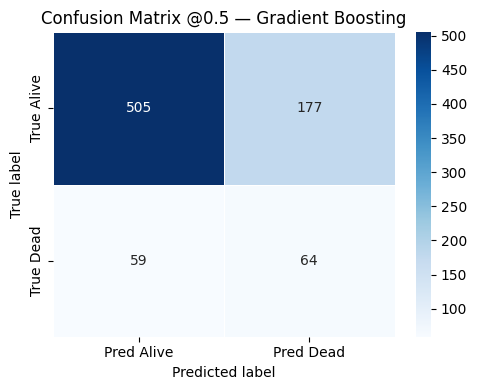


=== Test @ tuned threshold 0.568 ===
              precision    recall  f1-score   support

   Alive (0)       0.89      0.83      0.86       682
    Dead (1)       0.32      0.46      0.38       123

    accuracy                           0.77       805
   macro avg       0.61      0.64      0.62       805
weighted avg       0.81      0.77      0.79       805



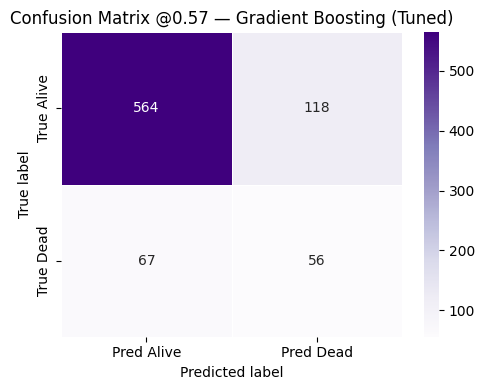

In [ ]:
GBCM = GradientBoostingClassifier(
    random_state=42
)
pipe = Pipeline(steps=[
    ("os", RandomOverSampler(random_state=42)),  # resample within each CV fold
    ("clf", GBCM)
])

oof_prob = cross_val_predict(
    pipe, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

# Threshold-free CV metrics
cv_roc = roc_auc_score(y_train, oof_prob)
cv_pr  = average_precision_score(y_train, oof_prob)
print(f"CV ROC-AUC: {cv_roc:.3f}")
print(f"CV PR-AUC : {cv_pr:.3f}")

# Choose decision threshold from CV (maximize F1 for Dead=1)
prec, rec, thr = precision_recall_curve(y_train, oof_prob)
f1s = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_th = thr[best_idx] if best_idx < len(thr) else 0.5
print(f"Chosen CV threshold by F1 (Dead=1): {best_th:.3f}")

# ==== Fit on all TRAIN, evaluate once on TEST ====
pipe.fit(X_train, y_train)
y_probs = pipe.predict_proba(X_test)[:, 1]

# --- Default threshold 0.5 ---
y_pred_default = (y_probs >= 0.5).astype(int)
print("\n=== Test @ threshold 0.5 ===")
print(classification_report(y_test, y_pred_default, target_names=["Alive (0)", "Dead (1)"]))
print("Test ROC-AUC:", roc_auc_score(y_test, y_probs))
print("Test PR-AUC :", average_precision_score(y_test, y_probs))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_default, labels=[0,1]),
            annot=True, fmt='d', cmap="Blues", linewidths=0.5,
            xticklabels=["Pred Alive","Pred Dead"], yticklabels=["True Alive","True Dead"])
plt.title("Confusion Matrix @0.5 — Gradient Boosting")
plt.xlabel("Predicted label"); plt.ylabel("True label")
plt.tight_layout(); plt.show()

# --- Tuned threshold from CV ---
y_pred_tuned = (y_probs >= best_th).astype(int)
print(f"\n=== Test @ tuned threshold {best_th:.3f} ===")
print(classification_report(y_test, y_pred_tuned, target_names=["Alive (0)", "Dead (1)"]))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned, labels=[0,1]),
            annot=True, fmt='d', cmap="Purples", linewidths=0.5,
            xticklabels=["Pred Alive","Pred Dead"], yticklabels=["True Alive","True Dead"])
plt.title(f"Confusion Matrix @{best_th:.2f} — Gradient Boosting (Tuned)")
plt.xlabel("Predicted label"); plt.ylabel("True label")
plt.tight_layout(); plt.show()

## **Analysis Report**

### **Gradient Boosting Classifier**

#### **Overview**
The Gradient Boosting Classifier (GBCM) was trained on the scaled training set and evaluated on the test set using classification reports and confusion matrices at two thresholds: the default (0.5) and the tuned threshold (0.568).

**Class labels**

1. Status = 0 - Alive
2. Status = 1 - Dead


#### **Results at threshold = 0.5 (default)**

1. Class 0 (Alive): Precision = 0.90, Recall = 0.74, F1 = 0.81

2. Class 1 (Dead): Precision = 0.27, Recall = 0.52, F1 = 0.35

3. Overall Accuracy: 0.71

4. ROC-AUC: 0.703, PR-AUC: 0.336

##### **Confusion matrix (0.5)**:

1. True Alive correctly predicted: 505

2. True Dead correctly predicted: 64

3. False negatives (Dead predicted as Alive): 59

4. False positives (Alive predicted as Dead): 177

##### **Interpretation**:
At the default threshold, the model detects over half of the Dead patients (recall = 0.52), but precision is low (0.27), meaning most predicted Dead are actually Alive. Accuracy is moderate (0.71), reflecting the trade-off between catching Dead cases and raising false alarms.



#### **Results at tuned threshold = 0.568**

1. Class 0 (Alive): Precision = 0.89, Recall = 0.83, F1 = 0.86

2. Class 1 (Dead): Precision = 0.32, Recall = 0.46, F1 = 0.38

3. Overall Accuracy: 0.77

##### **Confusion matrix (0.568)**:

1. True Alive correctly predicted: 564

2. True Dead correctly predicted: 56

3. False negatives (Dead predicted as Alive): 67

4. False positives (Alive predicted as Dead): 118

##### **Interpretation**:
At the tuned threshold, recall for Dead patients decreases slightly (0.46 vs 0.52), but precision improves (0.32 vs 0.27). This makes predictions of Dead somewhat more reliable, while overall accuracy rises to 0.77. However, many Dead patients are still being missed.

#### **Takeaways**

**Threshold choice critically shapes model behavior**:

  - **At 0.5 (default)**:Recall for Dead patients is higher (0.52), allowing the model to catch more at-risk patients, but precision is very low (0.27), resulting in many false alarms.

  - **At 0.568 (tuned)**:Precision improves modestly (0.32), but recall drops (0.46), so the model misses more Dead cases while being slightly more conservative.

**Clinical implication**: For prognosis, recall for Dead patients is typically prioritized over precision. While the tuned threshold improves overall accuracy and precision, it risks missing more true Dead cases, making the default threshold potentially safer in clinical settings.

**Traning and Evaluation of Support vector classifier**

CV ROC-AUC: 0.674
CV PR-AUC : 0.261
Chosen CV threshold by F1 (Dead=1): 0.517

=== Test @ threshold 0.5 ===
              precision    recall  f1-score   support

   Alive (0)       0.90      0.76      0.82       682
    Dead (1)       0.28      0.52      0.37       123

    accuracy                           0.73       805
   macro avg       0.59      0.64      0.60       805
weighted avg       0.80      0.73      0.75       805

Test ROC-AUC: 0.7110125646711012
Test PR-AUC : 0.2850296402661223


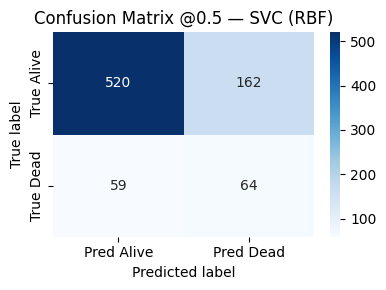


=== Test @ tuned threshold 0.517 ===
              precision    recall  f1-score   support

   Alive (0)       0.90      0.78      0.83       682
    Dead (1)       0.29      0.50      0.37       123

    accuracy                           0.74       805
   macro avg       0.59      0.64      0.60       805
weighted avg       0.80      0.74      0.76       805



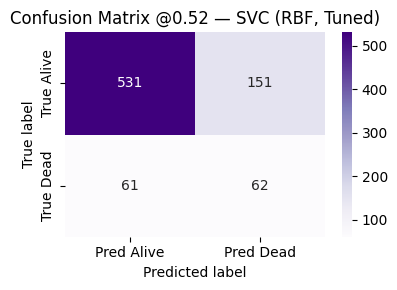

In [ ]:
SVCM = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)
pipe = Pipeline(steps=[
    ("os", RandomOverSampler(random_state=42)),  # resample within each CV fold
    ("scale", StandardScaler()),
    ("clf", SVCM)
])


oof_prob = cross_val_predict(
    pipe, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

# Threshold-free CV metrics
cv_roc = roc_auc_score(y_train, oof_prob)
cv_pr  = average_precision_score(y_train, oof_prob)
print(f"CV ROC-AUC: {cv_roc:.3f}")
print(f"CV PR-AUC : {cv_pr:.3f}")

# Choose decision threshold from CV (maximize F1 for Dead=1)
prec, rec, thr = precision_recall_curve(y_train, oof_prob)
f1 = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1)
best_th = thr[best_idx] if best_idx < len(thr) else 0.5
print(f"Chosen CV threshold by F1 (Dead=1): {best_th:.3f}")

# ==== Fit on all TRAIN, evaluate once on TEST ====
pipe.fit(X_train, y_train)
y_prob = pipe.predict_proba(X_test)[:, 1]

# --- Default threshold 0.5 ---
y_pred = (y_prob >= 0.5).astype(int)
print("\n=== Test @ threshold 0.5 ===")
print(classification_report(y_test, y_pred, target_names=["Alive (0)", "Dead (1)"]))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Test PR-AUC :", average_precision_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Pred Alive","Pred Dead"],
            yticklabels=["True Alive","True Dead"])
plt.title("Confusion Matrix @0.5 — SVC (RBF)")
plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()

# --- Tuned threshold from CV ---
y_pred_tuned = (y_prob >= best_th).astype(int)
print(f"\n=== Test @ tuned threshold {best_th:.3f} ===")
print(classification_report(y_test, y_pred_tuned, target_names=["Alive (0)", "Dead (1)"]))

cm_tuned = confusion_matrix(y_test, y_pred_tuned, labels=[0, 1])
plt.figure(figsize=(4,3))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap="Purples",
            xticklabels=["Pred Alive","Pred Dead"],
            yticklabels=["True Alive","True Dead"])
plt.title(f"Confusion Matrix @{best_th:.2f} — SVC (RBF, Tuned)")
plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()

## **Analysis Report**

### **Support Vector Classifier (RBF Kernel)**

#### **Overview**
The Support Vector Classifier was trained on the scaled training set and evaluated on the test set using classification reports and confusion matrices at two thresholds: the default (0.5) and the tuned threshold (0.517).

**Class labels**

1. Status = 0 - Alive
2. Status = 1 - Dead


#### **Results at threshold = 0.5 (default)**

1. Class 0 (Alive): Precision = 0.90, Recall = 0.76, F1 = 0.82

2. Class 1 (Dead): Precision = 0.28, Recall = 0.52, F1 = 0.37

3. Overall Accuracy: 0.73

4. ROC-AUC = 0.711, PR-AUC = 0.285

##### **Confusion matrix (0.5)**:

1. True Alive correctly predicted: 520

2. True Dead correctly predicted: 64

3. False negatives (Dead predicted as Alive): 59

4. False positives (Alive predicted as Dead): 162

##### **Interpretation**:
At the default threshold, the model detects over half of the Dead patients (recall = 0.52), but precision is very low (0.28). This means most patients predicted as Dead are actually Alive. Overall accuracy (0.73) is moderate, but the model produces many false alarms.



#### **Results at tuned threshold = 0.517**

1. Class 0 (Alive): Precision = 0.90, Recall = 0.78, F1 = 0.83

2. Class 1 (Dead): Precision = 0.29, Recall = 0.50, F1 = 0.37

3. Overall Accuracy: 0.74

##### **Confusion matrix (0.517)**:

1. True Alive correctly predicted: 531

2. True Dead correctly predicted: 62

3. False negatives (Dead predicted as Alive): 61

4. False positives (Alive predicted as Dead): 151

##### **Interpretation**:
At the tuned threshold, recall for Dead patients drops slightly (0.50 vs 0.52), while precision improves marginally (0.29 vs 0.28). The change makes predictions for Dead slightly more reliable, but at the cost of missing a few more actual Dead patients. Overall accuracy improves slightly (0.74).

#### **Takeaways**

**Threshold choice critically shapes model behavior**:

  - **At 0.5 (default)**:Recall for Dead patients is higher (0.52), but precision is very low (0.28), leading to many false positives.

  - **At 0.517 (tuned)**:Precision improves a bit (0.29), but recall falls slightly (0.50), making the model more conservative but also more likely to miss Dead cases.

**Clinical implication**: Since recall is often more important than precision in prognosis, the default threshold (0.5) may be safer for identifying more at-risk patients, even if it generates more false alarms.

**Traingin and Evaluation of MLPClassifier (Neural Network)**

CV ROC-AUC: 0.611
CV PR-AUC : 0.283
Chosen CV threshold by F1 (Dead=1): 0.505

=== Test @ threshold 0.5 ===
              precision    recall  f1-score   support

   Alive (0)       0.88      0.80      0.84       682
    Dead (1)       0.26      0.39      0.31       123

    accuracy                           0.73       805
   macro avg       0.57      0.59      0.57       805
weighted avg       0.78      0.73      0.76       805

Test ROC-AUC: 0.630617743127578
Test PR-AUC : 0.2529208637967343


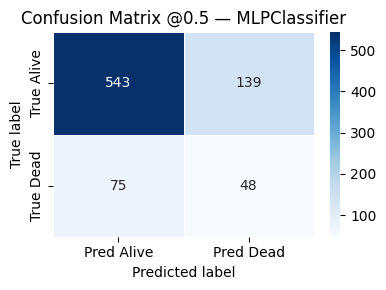


=== Test @ tuned threshold 0.505 ===
              precision    recall  f1-score   support

   Alive (0)       0.88      0.80      0.84       682
    Dead (1)       0.26      0.39      0.31       123

    accuracy                           0.74       805
   macro avg       0.57      0.59      0.57       805
weighted avg       0.78      0.74      0.76       805



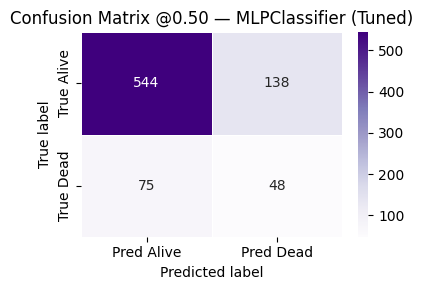

In [ ]:
MLPC = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=500,
    random_state=42,
    early_stopping=True,          # helps convergence/generalization
    validation_fraction=0.15,
    n_iter_no_change=10
)

pipe = Pipeline(steps=[
    ("os", RandomOverSampler(random_state=42)),  # resample within each CV fold
    ("scale", StandardScaler()),
    ("clf", MLPC)
])

oof_prob = cross_val_predict(
    pipe, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

# Threshold-free CV metrics
cv_roc = roc_auc_score(y_train, oof_prob)
cv_pr  = average_precision_score(y_train, oof_prob)
print(f"CV ROC-AUC: {cv_roc:.3f}")
print(f"CV PR-AUC : {cv_pr:.3f}")

# Choose decision threshold from CV (maximize F1 for Dead=1)
prec, rec, thr = precision_recall_curve(y_train, oof_prob)
f1s = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_th = thr[best_idx] if best_idx < len(thr) else 0.5
print(f"Chosen CV threshold by F1 (Dead=1): {best_th:.3f}")

# ==== Fit on all TRAIN, evaluate once on TEST ====
pipe.fit(X_train, y_train)
y_prob = pipe.predict_proba(X_test)[:, 1]

# ---------- Default threshold (0.5) ----------
y_pred_default = (y_prob >= 0.5).astype(int)
print("\n=== Test @ threshold 0.5 ===")
print(classification_report(y_test, y_pred_default, target_names=["Alive (0)", "Dead (1)"]))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Test PR-AUC :", average_precision_score(y_test, y_prob))

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_default, labels=[0,1]),
            annot=True, fmt='d', cmap="Blues", linewidths=0.5,
            xticklabels=["Pred Alive","Pred Dead"], yticklabels=["True Alive","True Dead"])
plt.title("Confusion Matrix @0.5 — MLPClassifier")
plt.xlabel("Predicted label"); plt.ylabel("True label")
plt.tight_layout(); plt.show()

# ---------- Tuned threshold from CV ----------
y_pred_tuned = (y_prob >= best_th).astype(int)
print(f"\n=== Test @ tuned threshold {best_th:.3f} ===")
print(classification_report(y_test, y_pred_tuned, target_names=["Alive (0)", "Dead (1)"]))

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned, labels=[0,1]),
            annot=True, fmt='d', cmap="Purples", linewidths=0.5,
            xticklabels=["Pred Alive","Pred Dead"], yticklabels=["True Alive","True Dead"])
plt.title(f"Confusion Matrix @{best_th:.2f} — MLPClassifier (Tuned)")
plt.xlabel("Predicted label"); plt.ylabel("True label")
plt.tight_layout(); plt.show()

## **Analysis Report**

### **MLPClassifier (Neural Network)**

#### **Overview**
The MLPClassifier was trained with two hidden layers (64, 32 neurons), max_iter=500, and evaluated using classification reports and confusion matrices at two thresholds: the default (0.5) and the tuned threshold (0.505).

**Class labels**

1. Status = 0 - Alive
2. Status = 1 - Dead


#### **Results at threshold = 0.5 (default)**

1. Class 0 (Alive): Precision = 0.88, Recall = 0.80, F1 = 0.84

2. Class 1 (Dead): Precision = 0.26, Recall = 0.39, F1 = 0.31

3. Overall Accuracy: 0.73

4. ROC-AUC: 0.631, PR-AUC: 0.253

##### **Confusion matrix (0.5)**:

1. True Alive correctly predicted: 543

2. True Dead correctly predicted: 48

3. False negatives (Dead predicted as Alive): 75

4. False positives (Alive predicted as Dead): 139

##### **Interpretation**:
At the default threshold, the MLPClassifier correctly identifies some Dead patients (recall = 0.39) but with very low precision (0.26), meaning most predicted Dead are actually Alive. Accuracy is moderate (0.73), but the model suffers from many false alarms and missed Dead patients.



#### **Results at tuned threshold = 0.505**

1. Class 0 (Alive): Precision = 0.88, Recall = 0.80, F1 = 0.84

2. Class 1 (Dead): Precision = 0.26, Recall = 0.39, F1 = 0.31

3. Overall Accuracy: 0.74

##### **Confusion matrix (0.505)**:

1. True Alive correctly predicted: 544

2. True Dead correctly predicted: 48

3. False negatives (Dead predicted as Alive): 75

4. False positives (Alive predicted as Dead): 138

##### **Interpretation**:
At the tuned threshold, performance is effectively unchanged compared to the default. Recall for Dead remains 0.39, precision stays at 0.26, and overall metrics shift only slightly (accuracy = 0.74). The threshold adjustment does not meaningfully improve sensitivity or precision for Dead patients.

#### **Takeaways**

**Threshold choice critically shapes model behavior**:

  - **At 0.5 (default)**:Recall for Dead = 0.39, precision = 0.26, meaning many Dead patients are missed and most predictions of Dead are false.

  - **At 0.505 (tuned)**:Metrics remain almost identical, offering no practical improvement in recall or precision.

**Clinical implication**: This MLP configuration struggles with the Dead=1 class. Unlike other models where threshold tuning changes the trade-off between recall and precision, here tuning has negligible effect.

## **Final Comparative analysis on Classification models**

### **1. Dataset Context**

1. **Total samples**: 4024 (Alive = ~85%, Dead = ~15%). Data set is highly imbalanced

2. **Train/Test split**: 80/20 stratified (Train = 2725 Alive, 493 Dead; Test = 682 Alive, 123 Dead).

3. **Cross-validation strategy**: StratifiedKFold (5 folds, shuffle=True, random_state=42) was used to generate out-of-fold predictions.

This ensures each fold preserves class balance.

Metrics like CV ROC-AUC and CV PR-AUC were computed threshold-free, without data leakage.

4. **Evaluation metrics**: Accuracy, Precision, Recall, F1-score, ROC-AUC, PR-AUC, plus Confusion Matrices.

5. **Clinical implication**: Minimizing false negatives (Dead predicted as Alive) is more critical than minimizing false positives.


## **2. Model-by-Model Performance**

1. **Logistic Regression**

  - Default threshold (0.5): Recall (Dead) = 0.60, Precision = 0.28, Accuracy = 0.70.

  - Tuned threshold (0.529): Recall (Dead) = 0.57, Precision = 0.29, Accuracy = 0.73.

  - Takeaway: Logistic Regression gives the highest recall among models. Useful for screening, but precision is poor (many false alarms).

2. **XGBoost**

  - Default threshold (0.5): Recall (Dead) = 0.41, Precision = 0.26, Accuracy = 0.73.

  - Tuned threshold (0.433): Recall (Dead) = 0.46, Precision = 0.23, Accuracy = 0.68.

  - Takeaway: Performance is weak overall. Recall improves slightly when tuned, but precision drops. Underperforms compared to Logistic Regression.

3. **Random Forest**

  - Default threshold (0.5): Recall (Dead) = 0.22, Precision = 0.34, Accuracy = 0.82.

  - Tuned threshold (0.323): Recall (Dead) = 0.40, Precision = 0.27, Accuracy = 0.74.

  - Takeaway: Excellent for Alive class but very poor for Dead unless threshold is lowered. Even then, recall is modest.

4. **Gradient Boosting**

  - Default threshold (0.5): Recall (Dead) = 0.52, Precision = 0.27, Accuracy = 0.71.

  - Tuned threshold (0.568): Recall (Dead) = 0.46, Precision = 0.32, Accuracy = 0.77.

  - Takeaway: Balanced performance, with moderate recall and slightly better precision than Logistic Regression. Provides one of the better trade-offs.

5. **Support vector Calssifier**

  - Default threshold (0.5): 0.52, Precision = 0.28, Accuracy = 0.73.

  - Tuned threshold (0.517): 0.50, Precision = 0.29, Accuracy = 0.74.

  - Takeaway: Performs similarly to Gradient Boosting. Precision slightly improves with tuning, but recall drops.

6. **MLPClassifier**

  - Default threshold (0.5): Recall (Dead) = 0.39, Precision = 0.26, Accuracy = 0.73.

  - Tuned threshold (0.26): Recall (Dead) = 0.39, Precision = 0.26, Accuracy = 0.74.

  - Takeaway: Threshold tuning had no effect. Model struggles with minority class (Dead), offering little clinical utility.


## **3. Comparative Insights**

1. **Best Recall (Dead=1 detection)**: Logistic Regression @ 0.5 (Recall = 0.60).
  - Safest for clinical screening, but very low precision (lots of false alarms)

2. **Best Precision (fewer false alarms)**: Gradient Boosting @ 0.568 (Precision = 0.32).
  - Still low, but slightly better than LR/SVC/MLP.

3. **Best Overall Trade-off**: Gradient Boosting
  - Moderate recall (0.52 to 0.46) and modest precision (0.27 to 0.32).

4. **Highest Accuracy**:Random Forest (0.82).
  - Misleading due to imbalance, nearly all Alive correctly classified, Dead mostly missed.

5. **Weakest Recall without tuning**: Random Forest (0.22 default) and MLP (0.39 default).
  - Require significant changes to be clinically viable.

## **4. Final Recommendation**

**Clinical Priority: Recall > Precision**
for clinical priority its better to flag more at-risk patients than miss deaths.


- **Early detection**: Logistic Regression @ 0.5 (Recall = 0.60).

- **Balanced decision-making**: Gradient Boosting (Recall = 0.52, Precision = 0.27).

- **Precision-critical scenario**: Gradient Boosting @ 0.568 (Precision = 0.32).

## **6.conclusion**

Logistic Regression remains the strongest baseline for recall, making it the safest option for early screening since it captures the most at-risk patients, albeit with very low precision and many false alarms. Gradient Boosting provides the best overall balance between recall and precision, offering a more clinically practical trade-off and making it the most reliable model for decision-making. In contrast, XGBoost underperforms relative to both Logistic Regression and Gradient Boosting, with weak recall and only modest precision gains, making it less suitable for this dataset. Random Forest achieves high overall accuracy by predicting Alive patients well, but it severely under-detects Dead patients unless the threshold is lowered. The Support Vector Classifier delivers moderate results and benefits slightly from threshold tuning, though it still lags behind Gradient Boosting in terms of clinical utility. Finally, the MLPClassifier struggles the most, as threshold tuning brings almost no improvement and recall for Dead patients remains low. Overall, Logistic Regression is best suited for early detection, Gradient Boosting is the most balanced choice for clinical application, and the remaining models provide limited value for reliably identifying Dead patients.

**Survival Lifeline prediction analysis**

In [ ]:
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test
from lifelines.utils import concordance_index
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sksurv.util import Surv
from sksurv.metrics import concordance_index_ipcw, brier_score
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
import xgboost as xgb
import shap
import survshap
import numpy as np
import warnings

In [ ]:
df_survival_data = df_transformed_data.copy()


In [ ]:
#checking if any months values is equal to zero, if month is value is zero we need to skip those records.
df_survival_data[df_survival_data['Survival Months'] ==0]

,Age,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,...,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3


In [ ]:
labels = ["Status","Survival Months"]
df_survival_data['Status'] = df_survival_data['Status'].astype(int)

#grouping the information using Estrogen Status
group_col = 'Estrogen Status' if 'Estrogen Status' in df_survival_data.columns else None
if group_col is not None:
    df_survival_data = df_survival_data.dropna(subset=[group_col])

## **Reason for Considering the splits only using the Estrogen Status**
For the group splits, I focused only on Estrogen Status (ER+ vs ER–). The reason is that estrogen receptor status is one of the most clinically important factors in breast cancer prognosis. Patients who are ER-positive typically respond better to hormone therapies and therefore show longer survival compared to ER-negative patients.

Another reason for using estrogen status is that it is a binary variable, which makes the Kaplan–Meier curves much clearer and easier to interpret. Many of the other features in the dataset, such as age or tumor size, are continuous and would require setting arbitrary cut-off points, which can make the analysis less reliable. Similarly, variables with many categories (like tumor stage or marital status) would create too many subgroups, leading to messy and hard-to-read curves.

In [ ]:
Time_event_variable = df_survival_data["Survival Months"].to_numpy()
Event_indicator = df_survival_data["Status"].to_numpy()

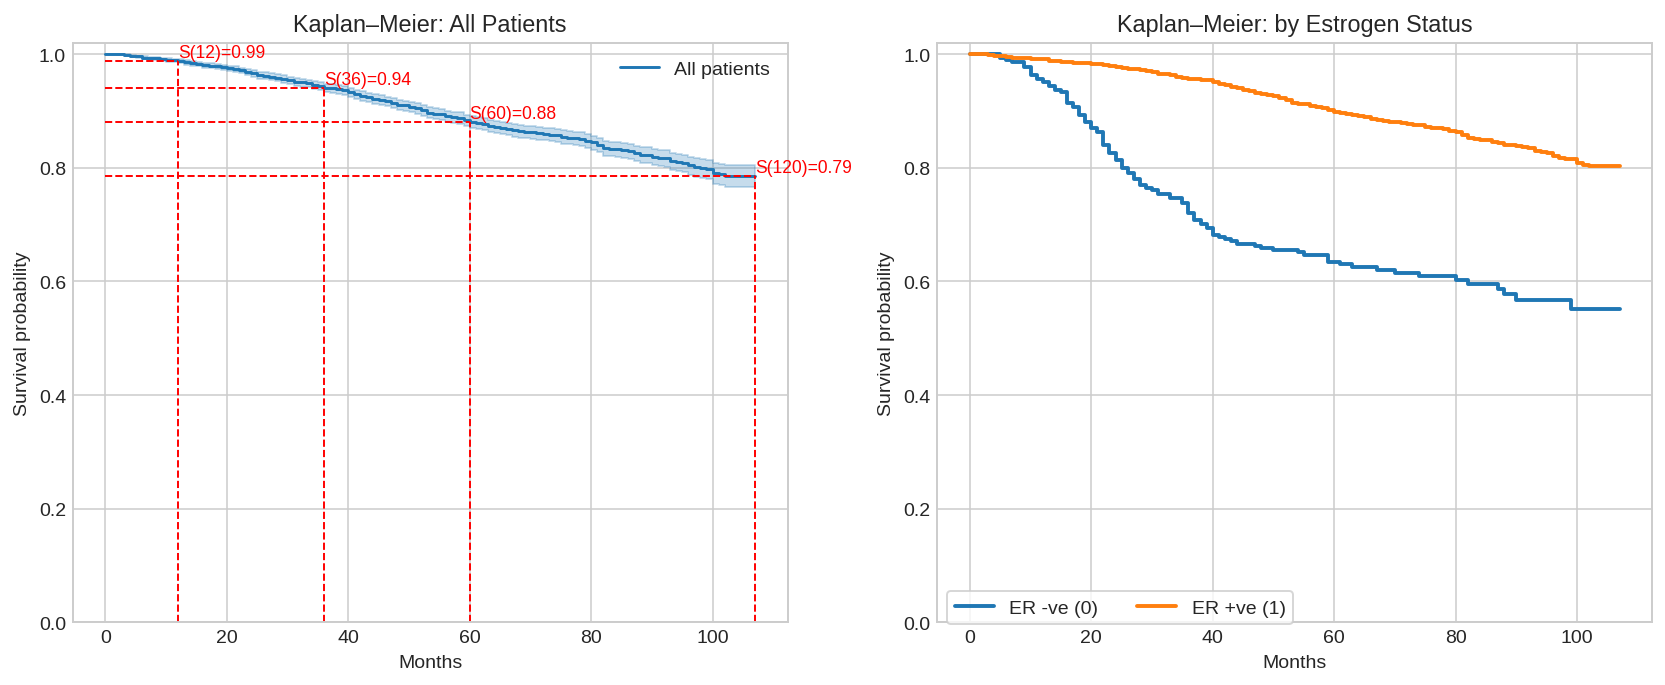

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
ncols = 2 if group_col is not None else 1
fig, axes = plt.subplots(1, ncols, figsize=(12 if ncols==2 else 6, 5), dpi=140)

if ncols == 1:
    axes = np.array([axes])

# ---- Left panel: overall KM
km_all = KaplanMeierFitter()
km_all.fit(Time_event_variable, event_observed=Event_indicator, label='All patients')


ax = axes[0]
km_all.plot(ax=ax, ci_show=True)
ax.set_title("Kaplan–Meier: All Patients")
ax.set_xlabel("Months")
ax.set_ylabel("Survival probability")
ax.set_ylim(0, 1.02)


# Annotate S(12), S(36),S(60) and S(120) + median
fmt="S({t})={y:.2f}"
for m in [12,36,60, 120]:
    step_index = km_all.survival_function_.index.asof(m)
    if np.isnan(step_index):
        step_index = km_all.survival_function_.index[0]
    y = float(km_all.survival_function_.loc[step_index, km_all._label])
    ax.vlines(step_index, 0, y, colors="red", linestyles="--", lw=1)
    ax.hlines(y, 0, step_index, colors="red", linestyles="--", lw=1)
    ax.text(step_index, y, fmt.format(t=int(m), y=y),
            va="bottom", ha="left", fontsize=9, color="red")

med = km_all.median_survival_time_
if np.isfinite(med):
    med_step = km_all.survival_function_.index.asof(med)
    y_med = float(km_all.survival_function_.loc[med_step, km_all._label])
    ax.axvline(med, color="tab:red", ls=":", lw=1.5)
    ax.text(med, 0.03, f"Median ≈ {med:.0f} mo",
            color="tab:red", rotation=90, va="bottom", ha="right", fontsize=9)



# ---- Right panel: KM stratified by Estrogen Status
km_strata = {}
ax = axes[1]
label_map = {0: "ER -ve (0)", 1: "ER +ve (1)"} if set(df_survival_data[group_col].unique()).issubset({0,1}) else None
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
for i, (g, dfg) in enumerate(df_survival_data.groupby(group_col)):
  km = KaplanMeierFitter()
  km.fit(dfg['Survival Months'], event_observed=dfg['Status'],label=label_map.get(g, str(g)) if label_map else str(g))
  km.plot(ax=ax, ci_show=False, linewidth=2, color=colors[i % len(colors)])
  km_strata[g] = km

ax.set_title(f"Kaplan–Meier: by {group_col}")
ax.set_xlabel("Months"); ax.set_ylabel("Survival probability")
ax.set_ylim(0, 1.02)
ax.legend(frameon=True, loc="lower left", bbox_to_anchor=(0, -0.02), ncol=2)

plt.tight_layout()
plt.show()

In [ ]:
s_5y  = float(km_all.predict(60))
s_10y = float(km_all.predict(120))
print(f"KM (All): 5-year S(60)={s_5y:.3f}, 10-year S(120)={s_10y:.3f}")

if group_col is not None and set(df_survival_data[group_col].unique()).issubset({0,1}):
    er0 = df_survival_data[df_survival_data[group_col] == 0]
    er1 = df_survival_data[df_survival_data[group_col] == 1]
    res = logrank_test(er0['Survival Months'], er1['Survival Months'],
                       event_observed_A=er0['Status'],
                       event_observed_B=er1['Status'])
    print(f"Log-rank test p-value (ER− vs ER+): {res.p_value:.3e}")

KM (All): 5-year S(60)=0.881, 10-year S(120)=0.786
Log-rank test p-value (ER− vs ER+): 2.497e-39


## **Kaplan–Meier Survival Analysis**

When we look at the overall Kaplan–Meier curve for all patients, the survival probability begins near 100% and gradually declines over time. At the five-year mark (60 months), about 88% of patients are still alive, while at ten years (120 months), survival decreases to around 79%. This shows that, although survival declines with time, the majority of patients continue to live well beyond five years, reflecting a generally favorable prognosis for this cohort.

When the data are split by estrogen receptor (ER) status, a clear difference emerges. Patients with ER-positive tumors maintain a much higher survival probability throughout the follow-up period, with survival still close to 80% at ten years. By contrast, patients with ER-negative tumors show a much steeper drop in survival, falling below 70% by around five years and continuing to decline thereafter.

The statistical test confirms that this difference is highly significant (log-rank test p-value = 2.5e-39). In other words, estrogen receptor status has a major impact on prognosis, with ER-positive patients living substantially longer than ER-negative patients. Clinically, this finding is consistent with the fact that ER-positive tumors can be treated effectively with hormone therapies, whereas ER-negative tumors do not benefit from these treatments and therefore tend to have poorer outcomes.

**Cox Proportional Hazards Model**

In [ ]:
# Defining feature sets
numeric_cols = [c for c in ["Age","Tumor Size","Regional Node Examined","Reginol Node Positive"]
                if c in df_survival_data.columns]

binary_cols = [c for c in ["Estrogen Status","Progesterone Status"] if c in df_survival_data.columns]

To create a Cox Proportional Hazards survival model, it's important to choose features that are known to affect a patient's prognosis.

**Numeric Features:**

1. **Age**: Older patients generally have poorer survival outcomes, making age an essential continuous predictor.
  
2. **Tumor Size**: Larger tumors are often linked to more advanced disease and a higher risk of adverse outcomes.
  
3. **Regional Nodes Examined**: The number of lymph nodes checked reflects the thoroughness of staging and surgery.
  
4. **Regional Nodes Positive**: The count of positive lymph nodes serves as one of the strongest predictors of recurrence and survival.

These numeric variables offer valuable insights into the extent and severity of the disease.

**Binary Features:**

1. **Estrogen Receptor (ER) Status**: This indicates whether the tumor is hormone-receptor-positive or negative. Typically, ER-positive cancers have better survival rates as they respond favorably to hormone therapy.
  
2. **Progesterone Receptor (PR) Status**: Like ER, PR positivity is usually linked to better outcomes, while PR negativity might suggest a more aggressive tumor.

These binary features shed light on crucial biological differences between tumors.

By combining these features, we can establish a solid foundation for survival modeling. Later on, we can also include categorical features like tumor stage, grade, race, and marital status using one-hot encoding.

In [ ]:
maybe_onehot_prefixes = [
    "Race_", "Marital Status_", "T Stage_", "N Stage_", "6th Stage_",
    "differentiate_", "Grade_"
]
onehot_cols = [c for c in df_survival_data.columns
               if any(c.startswith(p) for p in maybe_onehot_prefixes)]

def choose_reference_and_keep(cols, prefix):
    group = sorted([c for c in cols if c.startswith(prefix)])
    ref = group[0] if group else None
    keep = [c for c in group if c != ref]
    return ref, keep

kept_onehot = []
dropped_refs = []
for pref in maybe_onehot_prefixes:
    ref, keep = choose_reference_and_keep(onehot_cols, pref)
    if keep:
        kept_onehot.extend(keep)
    if ref:
        dropped_refs.append(ref)
print("Dropped reference columns (baselines):", dropped_refs)
#We do this to prevent multicollinearity and to define a reference group for each categorical variable, so hazard ratios can be interpreted in a meaningful way.

Dropped reference columns (baselines): ['Race_Other', 'Marital Status_Married', 'T Stage_T2', 'N Stage_N2', '6th Stage_IIB', 'differentiate_Poorly differentiated', 'Grade_1']


In [ ]:
X_num = df_survival_data[numeric_cols].copy() if numeric_cols else pd.DataFrame(index=df_survival_data.index)
if not X_num.empty:
    scaler = StandardScaler()
    X_num[numeric_cols] = scaler.fit_transform(X_num[numeric_cols])

X_bin  = df_survival_data[binary_cols].copy() if binary_cols else pd.DataFrame(index=df_survival_data.index)
X_cat  = df_survival_data[kept_onehot].copy() if kept_onehot else pd.DataFrame(index=df_survival_data.index)

X = pd.concat([X_num, X_bin, X_cat], axis=1)

cox_df = pd.concat([df_survival_data[["Survival Months","Status"]].reset_index(drop=True),
                    X.reset_index(drop=True)], axis=1)

In [ ]:
train_idx, test_idx = train_test_split(
    cox_df.index, test_size=0.2, random_state=42, stratify=cox_df["Status"]
)
cox_train = cox_df.loc[train_idx].reset_index(drop=True)
cox_test  = cox_df.loc[test_idx].reset_index(drop=True)

cph = CoxPHFitter(penalizer=0.01)
cph.fit(cox_train, duration_col="Survival Months", event_col="Status")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 3218 total observations, 2725 right-censored observations>
             duration col = 'Survival Months'
                event col = 'Status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 3218
number of events observed = 493
   partial log-likelihood = -3638.08
         time fit was run = 2025-12-07 04:23:30 UTC

---
                                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                          
Age                                0.15      1.16      0.05            0.05            0.24                1.06                1.27
Tumor Size                         0.16      1.17      0.06            0.04            0.27                1.04                1.31
Regional Node Examined            -0.24      0.79      0.05           -0.34           -0.13                0.71                0.88
Reginol Node Positive              0.25      1.29      0.06            0.14            0.37                1.15                1.44
Estrogen Status                   -0.61      0.54      0.15           -0.89           -0.32                0.41                0.73
Progesterone Status               -0.50      0.61      0.12           -0.73           -0.27                0.48                0.76
Race_White                        -0.02      0.98      0.12           -0.25            0.21                0.78                1.24
Marital Status_Separated           0.79      2.19      0.30            0.19            1.38                1.21                3.98
Marital Status_Single              0.23      1.26      0.12           -0.00            0.46                1.00                1.59
Marital Status_Widowed             0.29      1.34      0.17           -0.04            0.62                0.96                1.86
T Stage_T3                        -0.17      0.84      0.17           -0.51            0.17                0.60                1.18
T Stage_T4                         0.31      1.37      0.26           -0.21            0.83                0.81                2.30
N Stage_N3                         0.38      1.47      0.40           -0.40            1.17                0.67                3.23
6th Stage_IIIA                     0.33      1.39      0.12            0.09            0.57                1.09                1.77
6th Stage_IIIB                     0.50      1.65      0.35           -0.19            1.19                0.82                3.29
6th Stage_IIIC                     0.38      1.47      0.40           -0.40            1.17                0.67                3.23
differentiate_Undifferentiated     1.10      3.01      0.44            0.25            1.96                1.28                7.09
differentiate_Well differentiated -0.48      0.62      0.27           -1.02            0.05                0.36                1.05
Grade_2                           -0.08      0.93      0.24           -0.55            0.40                0.58                1.49
Grade_3                            0.35      1.41      0.24           -0.13            0.82                0.88                2.28

                                   cmp to     z      p  -log2(p)
covariate                                                       
Age                                  0.00  3.13 <0.005      9.17
Tumor Size                           0.00  2.66   0.01      6.98
Regional Node Examined               0.00 -4.38 <0.005     16.35
Reginol Node Positive                0.00  4.32 <0.005     15.99
Estrogen Status                      0.00 -4.15 <0.005     14.88
Progesterone Status                  0.00 -4.33 <0.005     16.03
Race_White                           0.00 -0.16   0.87      0.20
Marital Status_Separated             0.00  2.59   0.01      6.69
Marital

In [ ]:
cidx_train = concordance_index(
    cox_train["Survival Months"],
    -cph.predict_partial_hazard(cox_train),
    cox_train["Status"]
)
cidx_test = concordance_index(
    cox_test["Survival Months"],
    -cph.predict_partial_hazard(cox_test),
    cox_test["Status"]
)
print(f"\nC-index  Train: {cidx_train:.3f} | Test: {cidx_test:.3f}")


C-index  Train: 0.741 | Test: 0.712


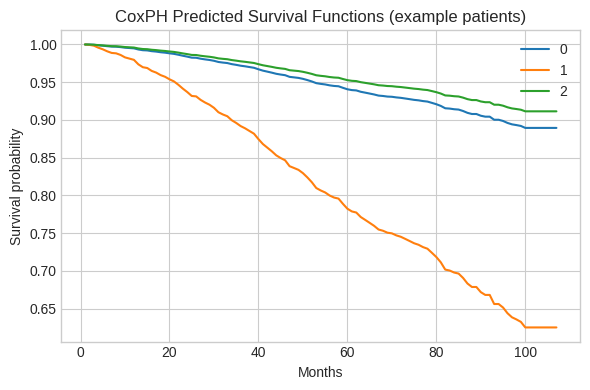

Patient 0: S(60m)=0.941, S(120m)=0.889
Patient 1: S(60m)=0.782, S(120m)=0.625
Patient 2: S(60m)=0.953, S(120m)=0.911


In [ ]:
n_show = min(3, len(cox_test))
sf = cph.predict_survival_function(cox_test.iloc[:n_show, :])
ax = sf.plot(figsize=(6,4))
ax.set_title("CoxPH Predicted Survival Functions (example patients)")
ax.set_xlabel("Months"); ax.set_ylabel("Survival probability")
plt.tight_layout(); plt.show()

def surv_at(sf_series, t):
    idx = sf_series.index.asof(t)
    return float(sf_series.loc[idx]) if pd.notnull(idx) else np.nan

for i in range(n_show):
    sfi = cph.predict_survival_function(cox_test.iloc[i:i+1, :])
    s5  = surv_at(sfi.squeeze(), 60)
    s10 = surv_at(sfi.squeeze(), 120)
    print(f"Patient {i}: S(60m)={s5:.3f}, S(120m)={s10:.3f}")

## **Cox Proportional Hazards Model Analysis**

The Cox Proportional Hazards (CoxPH) model was applied to estimate the impact of different clinical and demographic factors on survival. To avoid overfitting and unstable estimates, we included a small penalization factor (penalizer = 0.01). This acts like a safeguard that slightly shrinks the coefficients and helps the model remain stable when handling many categorical variables, such as tumor stage and grade.

Model performance was evaluated using the concordance index (C-index). The model achieved 0.741 on the training set and 0.712 on the test set. A C-index above 0.7 is generally considered good in clinical applications, showing that the model can meaningfully distinguish between higher- and lower-risk patients.

We also generated patient-specific predictions. For example:

- One patient had a 94% chance of surviving 5 years and 89% at 10 years, indicating low risk.

- Another patient’s survival dropped to 78% at 5 years and 63% at 10 years, highlighting higher risk due to unfavorable features.

- A third patient showed 95% at 5 years and 91% at 10 years, again reflecting a low-risk profile.

These results show how the CoxPH model can move beyond “alive vs. dead” classification and instead provide personalized survival curves over time. This makes the predictions more clinically meaningful, as doctors can estimate not just whether a patient is at risk, but how that risk changes over months and years.

In [ ]:
duration_col = "Survival Months"
event_col = "Status"

if duration_col not in df_survival_data.columns or event_col not in df_survival_data.columns:
    raise ValueError(f"Expected columns '{duration_col}' and '{event_col}' in df_raw. Found: {df_survival_data.columns.tolist()}")
feature_cols = [c for c in df_survival_data.columns if c not in [duration_col, event_col]]
X_full = df_survival_data[feature_cols].apply(pd.to_numeric, errors="coerce")
y_time = pd.to_numeric(df_survival_data[duration_col], errors="coerce").astype(float).values
y_event = pd.to_numeric(df_survival_data[event_col], errors="coerce").fillna(0).astype(int).values

print("Feature count:", X_full.shape[1])
print("First rows of X_full:")
display(X_full.head())

Feature count: 28
First rows of X_full:


,Age,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Race_Other,Race_White,Marital Status_Married,...,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3
0,68,0,4,1,1,24,1,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,50,0,35,1,1,14,5,0,1,1,...,0,1,0,0,0,0,0,0,1,0
2,58,0,63,1,1,14,7,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,58,0,18,1,1,2,1,0,1,1,...,0,0,0,0,1,0,0,0,0,1
4,47,0,41,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
X_train, X_test, y_time_tr, y_time_te, y_event_tr, y_event_te = train_test_split(
    X_full, y_time, y_event, test_size=0.2, random_state=42, stratify=y_event
)

ytr_struct = Surv.from_arrays(event=y_event_tr.astype(bool), time=y_time_tr.astype(float))
yte_struct = Surv.from_arrays(event=y_event_te.astype(bool), time=y_time_te.astype(float))

**Random Survival Forest (RSF)**

In [ ]:
rsf = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("model", RandomSurvivalForest(
            n_estimators=400,
            min_samples_split=10,
            min_samples_leaf=5,
            max_features="sqrt",
            n_jobs=-1,
            random_state=42
        ))
    ])
rsf.fit(X_train, ytr_struct)
print("RSF trained.")

# Time grid (months): use quantiles of observed training durations
rsf_times_ = np.quantile(y_time_tr, q=np.linspace(0.05, 0.95, 30))
surv_funcs = rsf.named_steps["model"].predict_survival_function(rsf.named_steps["imputer"].transform(X_test), return_array=False)
rsf_surv_test_ = np.vstack([sf(rsf_times_) for sf in surv_funcs])

def nearest_idx(times, t):
      return int(np.argmin(np.abs(times - t)))
for tstar in [12,36,60, 120]:
      idx = nearest_idx(rsf_times_, tstar)
      print(f"RSF S(t={tstar} mo) – first 5:", rsf_surv_test_[:5, idx])


RSF trained.
RSF S(t=12 mo) – first 5: [0.98073992 0.94389141 0.96164285 0.98838518 0.99710154]
RSF S(t=36 mo) – first 5: [0.97352184 0.90712628 0.91869135 0.97233795 0.99129958]
RSF S(t=60 mo) – first 5: [0.94673201 0.82780384 0.90018179 0.91177524 0.97661364]
RSF S(t=120 mo) – first 5: [0.8514493  0.73148904 0.84127771 0.83875714 0.95393491]


**Survival XGBoost (Cox) -> Survival Probabilities**

In [ ]:
imputer = SimpleImputer(strategy="median")
Xtr_imp = imputer.fit_transform(X_train)
Xte_imp = imputer.transform(X_test)

dtr = xgb.DMatrix(Xtr_imp, label=y_time_tr)
dtr.set_float_info("label_lower_bound", y_event_tr.astype(float))
dte = xgb.DMatrix(Xte_imp, label=y_time_te)
dte.set_float_info("label_lower_bound", y_event_te.astype(float))

params = {
        "objective": "survival:cox",
        "eval_metric": "cox-nloglik",
        "eta": 0.05,
        "max_depth": 4,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "lambda": 1.0,
        "tree_method": "hist",
        "verbosity": 1
    }

xgb_model = xgb.train(params, dtr, num_boost_round=600, evals=[(dtr, "train")], verbose_eval=False)
print("XGBoost Cox trained.")

risk_tr = xgb_model.predict(dtr)   # linear predictor
order = np.argsort(y_time_tr)
t = y_time_tr[order]
e = y_event_tr[order].astype(int)
r = np.exp(risk_tr[order])
uniq_times = np.unique(t[e == 1])
H0 = []
times_H0 = []
cumH = 0.0
for ut in uniq_times:
    at_risk = r[t >= ut].sum()
    d_events = (e[(t == ut)] == 1).sum()
    if at_risk > 0:
       cumH += d_events / at_risk
    times_H0.append(ut)
    H0.append(cumH)
baseline_hazard_ = np.array(H0)
cumhaz_times_ = np.array(times_H0)
print(f"Baseline hazard defined on {len(cumhaz_times_)} unique event times.")


XGBoost Cox trained.
Baseline hazard defined on 96 unique event times.


/tmp/ipython-input-205556490.py:29: RuntimeWarning: overflow encountered in exp
  r = np.exp(risk_tr[order])


In [ ]:

def xgb_survival_prob(model, X_new_df, times):
    X_imp = imputer.transform(X_new_df)
    dm = xgb.DMatrix(X_imp)
    risk = model.predict(dm)  # linear predictor
    H0_interp = np.interp(times, cumhaz_times_, baseline_hazard_, left=0.0, right=baseline_hazard_[-1])
    S = np.exp(-np.outer(np.exp(risk), H0_interp))
    return S


In [ ]:
xgb_times_ = np.quantile(y_time_tr, q=np.linspace(0.05, 0.95, 30))
S_xgb_te = xgb_survival_prob(xgb_model, X_test, xgb_times_)
def nearest_idx(times, t):
    return int(np.argmin(np.abs(times - t)))
for tstar in [12,36,60, 120]:
    idx = nearest_idx(xgb_times_, tstar)
    print(f"XGB S(t={tstar} mo) – first 5:", S_xgb_te[:5, idx])


XGB S(t=12 mo) – first 5: [1. 1. 1. 1. 1.]
XGB S(t=36 mo) – first 5: [1. 1. 1. 1. 1.]
XGB S(t=60 mo) – first 5: [0.99944872 0.9999934  0.9988711  0.99999851 0.99999946]
XGB S(t=120 mo) – first 5: [5.02764699e-16 6.55881042e-01 4.60021979e-32 9.08926555e-01
 9.66266373e-01]


/tmp/ipython-input-27431711.py:6: RuntimeWarning: overflow encountered in exp
  S = np.exp(-np.outer(np.exp(risk), H0_interp))


In [ ]:
def _extract_cindex_only(res):
    if isinstance(res, (tuple, list, np.ndarray)):
        return float(res[0])
    for attr in ("concordance_index_", "estimate", "cindex", "concordance_index"):
        if hasattr(res, attr):
            return float(getattr(res, attr))
    return float(res)


def _clean_inputs(pred_surv, times, y_test_struct, risk=None, clip_probs=True, drop_nan_rows=True):
    pred_surv = np.asarray(pred_surv, dtype=float)
    times = np.asarray(times, dtype=float)
    if pred_surv.ndim != 2:
        raise ValueError("pred_surv must be 2D (n_samples, n_times).")
    if times.ndim != 1:
        raise ValueError("times must be 1D.")
    if pred_surv.shape[1] != times.size:
        raise ValueError(f"`times` length ({times.size}) must equal pred_surv.shape[1] ({pred_surv.shape[1]}).")

    # ensure strictly increasing times and align columns
    if not np.all(np.diff(times) > 0):
        order = np.argsort(times)
        times = times[order]
        pred_surv = pred_surv[:, order]

    if clip_probs:
        pred_surv = np.clip(pred_surv, 0.0, 1.0)

    if risk is None:
        risk = 1.0 - pred_surv[:, -1]
    risk = np.asarray(risk, dtype=float)

    row_ok = np.isfinite(risk) & np.all(np.isfinite(pred_surv), axis=1)
    if drop_nan_rows:
        pred_surv = pred_surv[row_ok]
        risk = risk[row_ok]
        y_test_struct = y_test_struct[row_ok]
        if pred_surv.shape[0] < 2:
            raise ValueError("Not enough valid rows after removing NaNs/Inf to compute metrics.")
    else:
        if not np.all(row_ok):
            bad = np.where(~row_ok)[0][:10].tolist()
            raise ValueError(f"NaNs/Inf present in inputs at rows {bad} (first 10 shown).")

    return pred_surv, times, y_test_struct, risk


def evaluate_survival(pred_surv, times, y_test_struct, y_train_struct, risk=None,
                      clip_probs=True, drop_nan_rows=True):
    pred_surv, times, y_test_valid, risk_valid = _clean_inputs(
        pred_surv, times, y_test_struct, risk=risk, clip_probs=clip_probs, drop_nan_rows=drop_nan_rows
    )

    # IPCW C-index
    res = concordance_index_ipcw(y_train_struct, y_test_valid, risk_valid)
    ctd = _extract_cindex_only(res)

    # Brier curve + IBS
    bs_t, bs = brier_score(y_train_struct, y_test_valid, pred_surv, times)
    area = np.trapezoid(bs, bs_t) if hasattr(np, "trapezoid") else np.trapz(bs, bs_t)
    ibs = float(area / (bs_t[-1] - bs_t[0]))

    return float(ctd), float(ibs)


def bootstrap_cindex_ipcw(y_train_struct, y_test_struct, risk, B=500, random_state=0):
    rng = np.random.default_rng(random_state)
    risk = np.asarray(risk, float)
    n = len(risk)
    if n != len(y_test_struct):
        raise ValueError("risk and y_test_struct length mismatch.")

    samples = []
    for _ in range(B):
        idx = rng.integers(0, n, size=n)
        res = concordance_index_ipcw(y_train_struct, y_test_struct[idx], risk[idx])
        samples.append(_extract_cindex_only(res))
    samples = np.asarray(samples, float)
    se = float(samples.std(ddof=1))
    lo, hi = np.quantile(samples, [0.025, 0.975])
    return se, (float(lo), float(hi)), samples

# ---- RSF ----
ctd_rsf, ibs_rsf = evaluate_survival(
    pred_surv=rsf_surv_test_,
    times=rsf_times_,
    y_test_struct=yte_struct,
    y_train_struct=ytr_struct,
    risk=None  # uses 1 - S(t_last)
)
print(f"RSF: C-index={ctd_rsf:.3f}, IBS={ibs_rsf:.3f}")


risk_like_rsf = 1.0 - np.clip(rsf_surv_test_[:, -1], 0, 1)
ctd_harrell_rsf, *_ = concordance_index_censored(
        yte_struct["event"], yte_struct["time"], risk_like_rsf
    )
print(f"RSF (Harrell): C-index={ctd_harrell_rsf:.3f}")


risk_xgb = None
try:
    risk_xgb = xgb_model.predict(dte)  # if you already have a DMatrix for X_test
except Exception:
    try:
        import xgboost as xgb
        Xte_imp = imputer.transform(X_test)  # same imputer used in XGB training
        dte = xgb.DMatrix(Xte_imp)
        risk_xgb = xgb_model.predict(dte)
    except Exception:
        pass

ctd_xgb, ibs_xgb = evaluate_survival(
    pred_surv=S_xgb_te,
    times=xgb_times_,
    y_test_struct=yte_struct,
    y_train_struct=ytr_struct,
    risk=risk_xgb
)
print(f"XGB-Cox: C-index={ctd_xgb:.3f}, IBS={ibs_xgb:.3f}")

risk_for_boot = risk_xgb if risk_xgb is not None else 1.0 - np.clip(S_xgb_te[:, -1], 0, 1)
se_xgb, (lo_xgb, hi_xgb), _ = bootstrap_cindex_ipcw(ytr_struct, yte_struct, risk_for_boot, B=500, random_state=0)
print(f"XGB-Cox: C-index SE (bootstrap) = {se_xgb:.3f}, 95% CI [{lo_xgb:.3f}, {hi_xgb:.3f}]")


ctd_harrell_xgb, *_ = concordance_index_censored(
        yte_struct["event"], yte_struct["time"], risk_for_boot
    )
print(f"XGB-Cox (Harrell): C-index={ctd_harrell_xgb:.3f}")


RSF: C-index=0.647, IBS=0.100
RSF (Harrell): C-index=0.696
XGB-Cox: C-index=0.653, IBS=0.148
XGB-Cox: C-index SE (bootstrap) = 0.033, 95% CI [0.594, 0.716]
XGB-Cox (Harrell): C-index=0.660


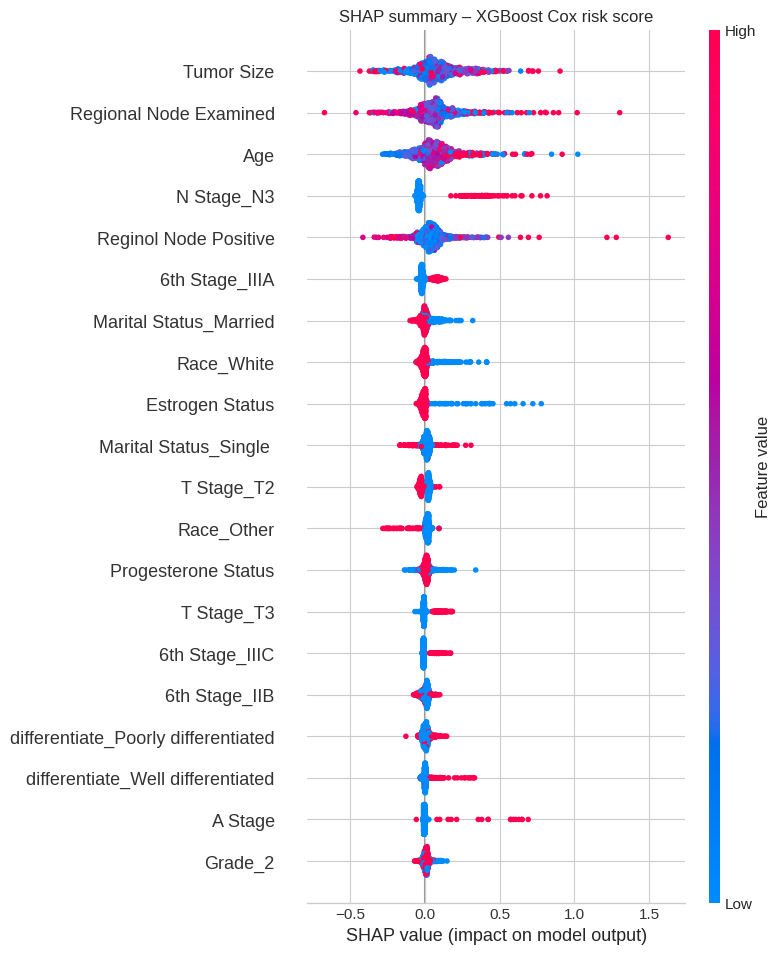

Risk-score SHAP explanation completed.
Computing SHAP for S(t=12m) on 120 samples…


  0%|          | 0/120 [00:00<?, ?it/s]

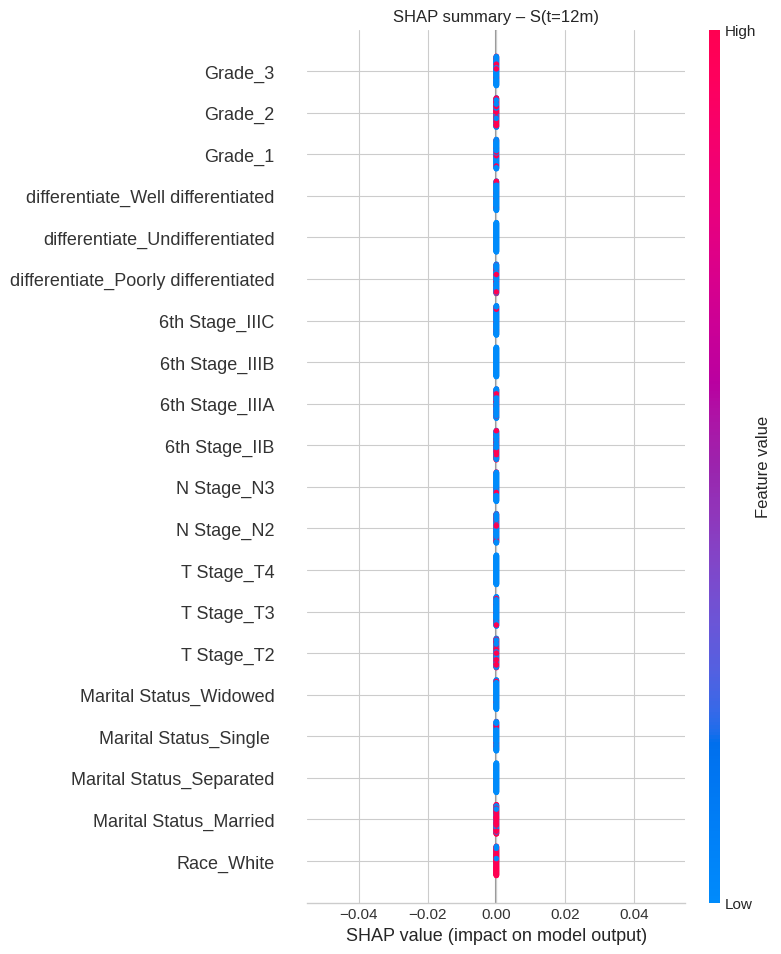

Computing SHAP for S(t=36m) on 120 samples…


  0%|          | 0/120 [00:00<?, ?it/s]

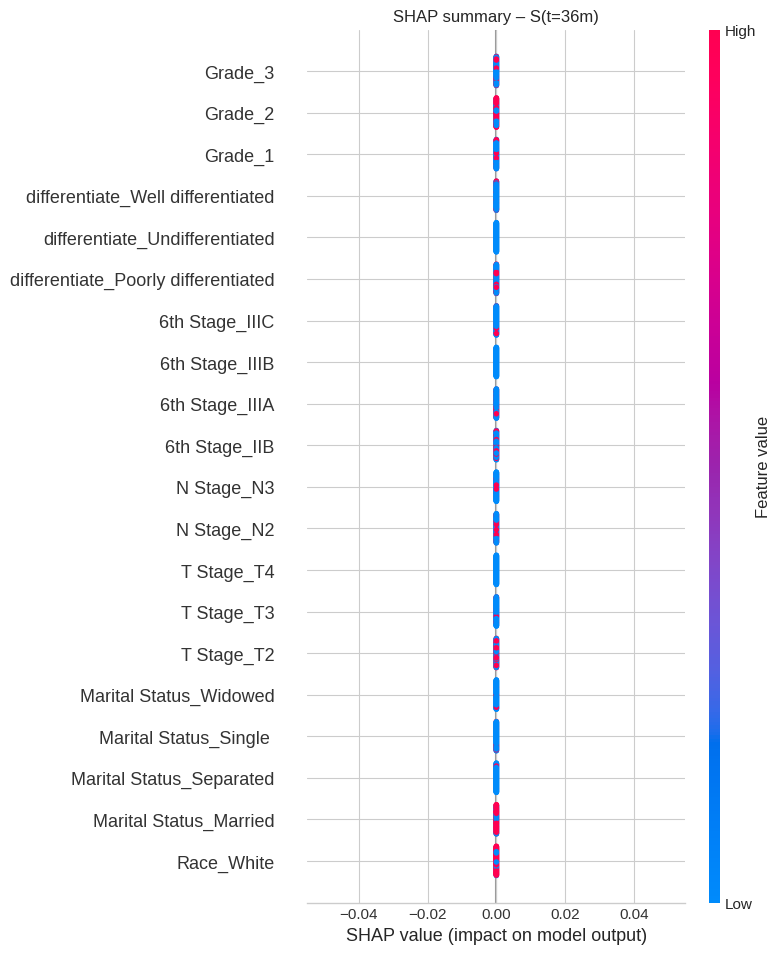

Computing SHAP for S(t=60m) on 120 samples…


  0%|          | 0/120 [00:00<?, ?it/s]

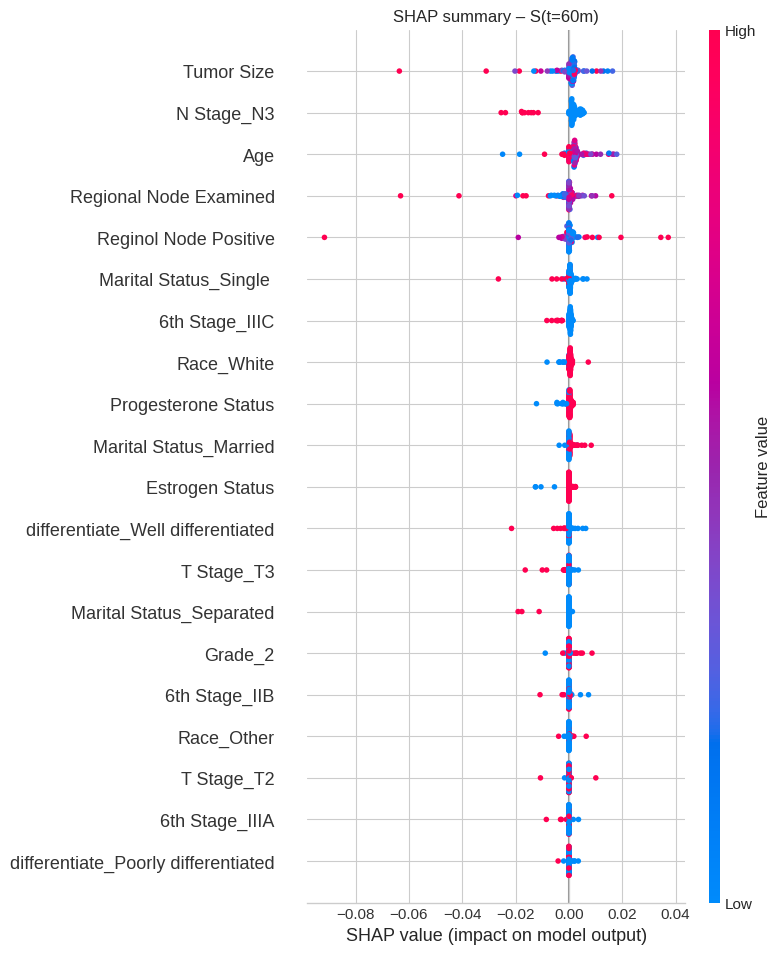

Computing SHAP for S(t=100m) on 120 samples…


  0%|          | 0/120 [00:00<?, ?it/s]

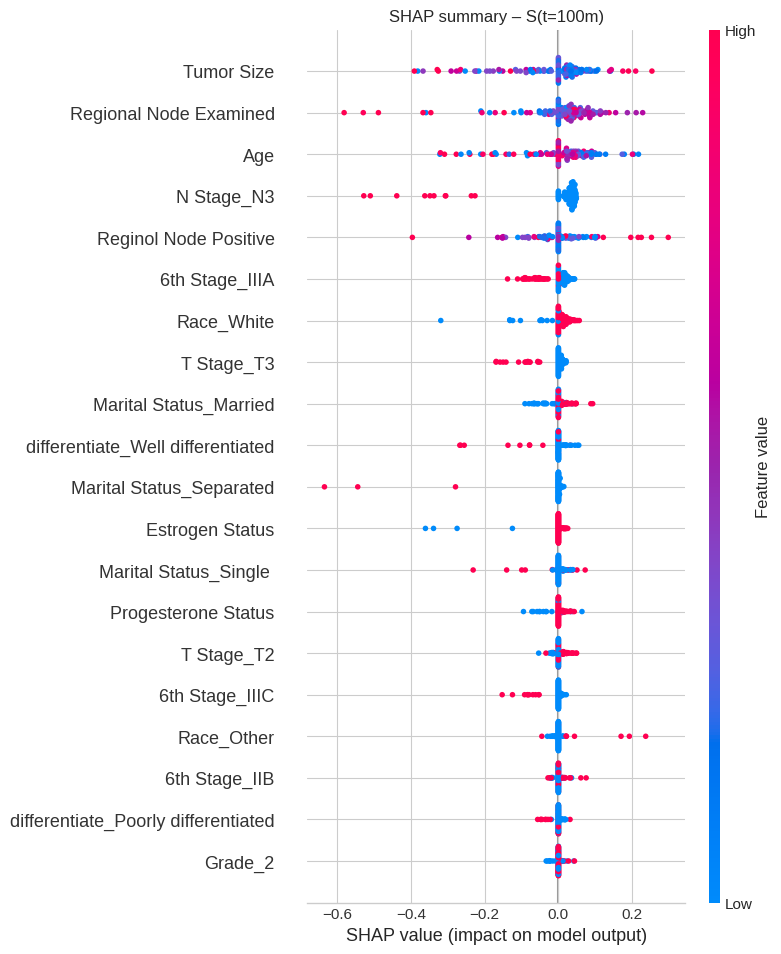

Per-time S(t) SHAP explanations computed for times: [12.0, 36.0, 60.0, 100.0]


In [ ]:
def xgb_survival_prob_stable(model, X_new_df, times, imputer=None,
                             risk_clip=(-15.0, 15.0), logS_floor=-50.0):

    if not isinstance(X_new_df, pd.DataFrame):
        X_new_df = pd.DataFrame(X_new_df, columns=X_train.columns)

    X_imp = imputer.transform(X_new_df) if imputer is not None else X_new_df.values

    dm = xgb.DMatrix(X_imp)
    risk = model.predict(dm)  # higher = higher hazard
    if risk_clip is not None:
        risk = np.clip(risk, risk_clip[0], risk_clip[1])

    times = np.asarray(times, dtype=float)
    H0 = np.interp(times, cumhaz_times_, baseline_hazard_,
                   left=0.0, right=baseline_hazard_[-1])

    hazard_mult = np.exp(risk)
    logS = - np.outer(hazard_mult, H0)
    logS = np.maximum(logS, float(logS_floor))

    S = np.exp(logS)
    S = np.clip(S, 1e-12, 1.0)
    return S


raw_times_explain = np.array([12.0, 36.0, 60.0, 120.0], dtype=float)
t_min = 0.0 if len(cumhaz_times_) == 0 else float(np.min(cumhaz_times_))
t_max = 1.0 if len(cumhaz_times_) == 0 else float(np.max(cumhaz_times_))
times_explain = np.clip(raw_times_explain, t_min, t_max)

try:
    try:
        Xte_imp = imputer.transform(X_test)
    except NameError:
        warnings.warn("No `imputer` found; using raw X_test for risk-score SHAP.")
        Xte_imp = np.asarray(X_test.values if isinstance(X_test, pd.DataFrame) else X_test, float)
    except Exception as e:
        warnings.warn(f"Imputer failed ({e}); using raw X_test for risk-score SHAP.")
        Xte_imp = np.asarray(X_test.values if isinstance(X_test, pd.DataFrame) else X_test, float)

    explainer_tree = shap.TreeExplainer(xgb_model)
    shap_values_risk = explainer_tree.shap_values(Xte_imp)  # (n_samples, n_features)
    shap.summary_plot(shap_values_risk, X_test if isinstance(X_test, pd.DataFrame) else X_test,
                      show=False)
    plt.title("SHAP summary – XGBoost Cox risk score")
    plt.show()
    print("Risk-score SHAP explanation completed.")
except Exception as e:
    warnings.warn(f"Risk-score TreeExplainer failed: {e}")


def predict_S_at_t_stable(X_array, t):
    X_df = pd.DataFrame(X_array, columns=X_train.columns)
    S = xgb_survival_prob_stable(xgb_model, X_df, np.array([t]),
                                 imputer=imputer if 'imputer' in globals() else None)
    return S[:, 0]

try:
    bg_df = X_train.sample(min(100, len(X_train)), random_state=0) if isinstance(X_train, pd.DataFrame) else pd.DataFrame(X_train).sample(min(100, len(X_train)), random_state=0)
    bg = bg_df.values
    n_eval = min(120, len(X_test))
    X_eval_df = X_test.iloc[:n_eval] if isinstance(X_test, pd.DataFrame) else pd.DataFrame(X_test)[:n_eval]
    X_eval = X_eval_df.values

    shap_values_by_time = {}
    for t in times_explain:
        print(f"Computing SHAP for S(t={t:.0f}m) on {n_eval} samples…")
        f_t = lambda X: predict_S_at_t_stable(X, float(t))
        explainer_kernel = shap.KernelExplainer(f_t, bg)
        sv_t = explainer_kernel.shap_values(X_eval)  # (n_eval, n_features)
        shap_values_by_time[float(t)] = sv_t

        shap.summary_plot(sv_t, X_eval_df, show=False)
        plt.title(f"SHAP summary – S(t={t:.0f}m)")
        plt.show()

    print("Per-time S(t) SHAP explanations computed for times:", list(shap_values_by_time.keys()))

    def top_features_from_shap(shap_vals, feature_names, k=15):
        vals = np.abs(np.asarray(shap_vals))
        mean_abs = vals.mean(axis=0)
        order = np.argsort(mean_abs)[-k:][::-1]
        return pd.DataFrame({"feature": np.array(feature_names)[order],
                             "mean|SHAP|": mean_abs[order]})

except Exception as e:
    warnings.warn(
        "KernelExplainer for S(t) failed EVEN after stabilization. "
        f"Error: {e}. Check that `baseline_hazard_`, `cumhaz_times_` exist and `times_explain` lies within training support."
    )


Based on the above results, Patients with bigger tumors, more lymph nodes involved, and older age tend to have worse long-term survival, while those with positive hormone receptors and who are married do a bit better. The stage markers (like T3 or Stage III) also line up with lower survival, which fits clinical intuition. At early follow-up (12–36 months) almost everyone looks fairly safe. By 5–8 years out, differences between patients become clearer, and tumor size, node status, and age really drive the predictions. One quirky signal is Regional Node Examined looking slightly protective; that’s likely a by product of more thorough care rather than a true biological effect, so take it with caution. Between the two methods, both rank patients similarly, but the Random Survival Forest gives more trustworthy survival probabilities over time, while XGBoost is great for crisp risk ranking and easy-to-read explanations.